# DS 3000 - Practicum 1: EDA and Storytelling with Data

**Students Name**: Andrew Cooper, Wilson Lin,
Ruyao (Anthony) Tian, Kelsey Wandera

**Date**: February 8th, 2025


**Note:**
- Ensure that all visualizations have a title and label both the x and y axes.

- All numeric calculations should be rounded to 2 decimal places.

- Use markdown cells to explain your observations about the data.

- Include the names of all teammates on all submissions.

- Ensure that your Python code is in a code cell and that it executes without errors.

### Submission Instructions
Submit a .ipynb file with your group's submission and ensure that the work is reproducible. Explain all steps to ensure that TAs can understand the output from your analysis. Note: the purpose of this practicum is to tell a story with the data. Ensure that your work is easy to understand.

In [3]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sys.path.append("/content/drive/MyDrive/")

# Question 1 — The DS Problem
In your own words, formulate the Data Science problem that you were given.

Flight delays are a problem of ranging severities; from minor inconvenience, to missed connections, financial loss, to even higher consequences downstream (i.e I must see my dying parent in a hospital across the country and this flight delay has forced me to forfeit that opportunity forever). 

To ameliorate this problem, this project will examine air traffic trends at specific airports/regions, and identify specific airlines or carriers more prone to delays, with the aim of uncovering insights that would help reduce flight delays moving forward.


# Question 2 — Prepare the Data (10 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).

2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.

3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.

In [7]:
df = pd.read_csv("2019_ONTIME_REPORTING_FSW.csv")
df.head()

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [8]:
# checking types:
# FL_DATE: datetime; CARRIER_CODE: string; TAIL_NUM: string; FL_NUM: int; ORIGIN: string; ORIGIN_ST: string; DEST: string;
# DEST_ST: string; DEP_TIME: float; DEP_DELAY: float; ARR_TIME: float; ARR_DELAY: float; ELAPSED_TIME: float; DISTANCE: int
print(df.dtypes)

FL_DATE          object
CARRIER_CODE     object
TAIL_NUM         object
FL_NUM            int64
ORIGIN           object
ORIGIN_ST        object
DEST             object
DEST_ST          object
DEP_TIME        float64
DEP_DELAY       float64
ARR_TIME        float64
ARR_DELAY       float64
ELAPSED_TIME    float64
DISTANCE          int64
dtype: object


The following Data types are unsuitable and need to undergo conversions for consistency and correct data handling:
 - FL_DATE → datetime: Converts flight date to a datetime format for easier time-based analysis.
 - CARRIER_CODE, TAIL_NUM, ORIGIN, ORIGIN_ST, DEST, DEST_ST → string: Ensures text-based identifiers are treated as strings.
 - DEP_TIME, ARR_TIME -> HH:MM format: These are treated as 24 hour format and as such should be formatted to HH:MM.


In [10]:
# Define column categories based on their expected data types
datetime_cols = ["FL_DATE"]  #Columns that should be converted to datetime format
string_cols = ["CARRIER_CODE", "TAIL_NUM", "ORIGIN", "ORIGIN_ST", "DEST", "DEST_ST"]  #Columns that should be stored as strings
int_cols = ["FL_NUM", "DISTANCE"]  #Columns that should be stored as integers
float_cols = ["DEP_TIME", "DEP_DELAY", "ARR_TIME", "ARR_DELAY", "ELAPSED_TIME"]  #Columns that should be stored as floats
cleaned_df = df.copy()

# Conversions:
for col in datetime_cols:
    if col in cleaned_df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
for col in string_cols:
    if col in cleaned_df.columns:
        df[col] = df[col].astype("string")
for col in int_cols:
    if col in cleaned_df.columns:
        df[col] = df[col].astype("int64", errors="ignore")
for col in float_cols:
    if col in cleaned_df.columns:
        df[col] = df[col].astype("float64", errors="ignore")
cleaned_df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,750.0,0.0,911.0,0.0,81.0,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,1855.0,0.0,2148.0,0.0,353.0,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,802.0,2.0,1128.0,0.0,386.0,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,604.0,0.0,802.0,0.0,118.0,550


In [11]:
# Changing departure time and arrival time to HH:MM format
cleaned_df["DEP_TIME"] = pd.to_numeric(cleaned_df["DEP_TIME"], errors="coerce")
cleaned_df["ARR_TIME"] = pd.to_numeric(cleaned_df["ARR_TIME"], errors="coerce")

def format_flight_times(df, hhmm_col):
    '''Changes HHMM format to HH:MM. Input df and a 4-digit column for conversion.
    Returns pandas df with formatted time column.'''
    cleaned_df = df.copy()
    cleaned_df[hhmm_col] = pd.to_numeric(cleaned_df[hhmm_col], errors="coerce")
    cleaned_df.dropna(subset=[hhmm_col], inplace=True)
    cleaned_df[hhmm_col] = cleaned_df[hhmm_col].astype(int).astype(str).str.zfill(4)
    cleaned_df[hhmm_col] = cleaned_df[hhmm_col].apply(lambda x: f"{x[:2]}:{x[2:]}")
    return cleaned_df

cleaned_df = format_flight_times(df, "DEP_TIME")
cleaned_df = format_flight_times(cleaned_df, "ARR_TIME")
cleaned_df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,08:28,0.0,13:53,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,19:07,0.0,21:59,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,19:04,104.0,20:16,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,17:29,4.0,22:15,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,06:56,0.0,08:41,0.0,285.0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,07:50,0.0,09:11,0.0,81.0,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,18:55,0.0,21:48,0.0,353.0,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,08:02,2.0,11:28,0.0,386.0,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,06:04,0.0,08:02,0.0,118.0,550


In [12]:
cleaned_df.dtypes

FL_DATE         datetime64[ns]
CARRIER_CODE    string[python]
TAIL_NUM        string[python]
FL_NUM                   int64
ORIGIN          string[python]
ORIGIN_ST       string[python]
DEST            string[python]
DEST_ST         string[python]
DEP_TIME                object
DEP_DELAY              float64
ARR_TIME                object
ARR_DELAY              float64
ELAPSED_TIME           float64
DISTANCE                 int64
dtype: object

In [13]:
# working w/ missing values:
missing_values_counts = cleaned_df.isnull().sum()
print(missing_values_counts)
missing_values_prop = cleaned_df.isnull().sum() / len(df)
print(missing_values_prop)
len(cleaned_df)

FL_DATE            0
CARRIER_CODE       0
TAIL_NUM           0
FL_NUM             0
ORIGIN             0
ORIGIN_ST          0
DEST               0
DEST_ST            0
DEP_TIME           0
DEP_DELAY          0
ARR_TIME           0
ARR_DELAY       3640
ELAPSED_TIME    3640
DISTANCE           0
dtype: int64
FL_DATE         0.000000
CARRIER_CODE    0.000000
TAIL_NUM        0.000000
FL_NUM          0.000000
ORIGIN          0.000000
ORIGIN_ST       0.000000
DEST            0.000000
DEST_ST         0.000000
DEP_TIME        0.000000
DEP_DELAY       0.000000
ARR_TIME        0.000000
ARR_DELAY       0.001918
ELAPSED_TIME    0.001918
DISTANCE        0.000000
dtype: float64


1869259

Based on the above column, the fact that there's 1869259 rows and only 3640 missing values in ARR_DELAY and ELAPSED_TIME; making missing values 0.001918% of the whole data, it is fine to drop the rows containing missing values.

In [15]:
cleaned_df = cleaned_df.dropna(subset=["ARR_DELAY", "ELAPSED_TIME"])
cleaned_df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,08:28,0.0,13:53,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,19:07,0.0,21:59,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,19:04,104.0,20:16,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,17:29,4.0,22:15,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,06:56,0.0,08:41,0.0,285.0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,07:50,0.0,09:11,0.0,81.0,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,18:55,0.0,21:48,0.0,353.0,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,08:02,2.0,11:28,0.0,386.0,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,06:04,0.0,08:02,0.0,118.0,550


In [16]:
print(cleaned_df.isnull().sum())

FL_DATE         0
CARRIER_CODE    0
TAIL_NUM        0
FL_NUM          0
ORIGIN          0
ORIGIN_ST       0
DEST            0
DEST_ST         0
DEP_TIME        0
DEP_DELAY       0
ARR_TIME        0
ARR_DELAY       0
ELAPSED_TIME    0
DISTANCE        0
dtype: int64


Missing values have been dropped correctly

In [18]:
# Filter invalid values
# => Anything negative for DEP_DELAY, ARR_DELAY doesn't make sense
# => Anything greater than 23:59 for DEP_TIME and ARR_TIME doesn't make sense
cols_to_check = ["DEP_DELAY", "ARR_DELAY"]
cleaned_df.loc[:, cols_to_check] = cleaned_df[cols_to_check].apply(pd.to_numeric, errors="coerce")

invalid_rows = cleaned_df[(cleaned_df[cols_to_check] < 0).any(axis=1)]
invalid_times = cleaned_df[
    ~cleaned_df["DEP_TIME"].astype(str).str.match(r'^[0-2][0-9]:[0-5][0-9]$', na=False) |
    ~cleaned_df["ARR_TIME"].astype(str).str.match(r'^[0-2][0-9]:[0-5][0-9]$', na=False)]
print(f"Invalid negative values: {invalid_rows.shape[0]}")
print(f"Invalid time format values: {invalid_times.shape[0]}")

Invalid negative values: 0
Invalid time format values: 0


There are no invalid negative values or invalid time format values within the dataframe

In [20]:
# Filter any outliers in DEP_DELAY, ARR_DELAY, ELAPSED_TIME, DISTANCE
def remove_outliers(df, column):
    '''Removes outliers from a column above 95th percentile'''
    upper_bound = np.percentile(df[column].dropna(), 99)
    mask = df[column] <= upper_bound
    cleaned_df = df[mask]
    return cleaned_df

In [21]:
columns_w_outliers = ["DEP_DELAY", "ARR_DELAY", "ELAPSED_TIME", "DISTANCE"]
cleaned_df = df.copy()
for col in columns_w_outliers:
    cleaned_df = remove_outliers(cleaned_df, col)

Outliers have been removed from the dataframe

In [23]:
cleaned_df.drop_duplicates(inplace=True)

In [24]:
cleaned_df.shape

(1794205, 14)

In [25]:
# summary stats
summary_stats = cleaned_df.describe()
summary_stats

,FL_DATE,FL_NUM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
count,1794205,1.794205e+06,1.794205e+06,1.794205e+06,1.794205e+06,1.794205e+06,1.794205e+06,1.794205e+06
mean,2019-07-04 05:37:45.467547648,2.062954e+03,1.335765e+03,8.755334e+00,1.472491e+03,8.195664e+00,1.704250e+02,1.115630e+03
min,2019-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.600000e+01,6.600000e+01
25%,2019-04-06 00:00:00,7.170000e+02,9.100000e+02,0.000000e+00,1.052000e+03,0.000000e+00,9.300000e+01,4.470000e+02
50%,2019-07-06 00:00:00,1.656000e+03,1.321000e+03,0.000000e+00,1.517000e+03,0.000000e+00,1.500000e+02,9.310000e+02
75%,2019-10-02 00:00:00,2.742000e+03,1.753000e+03,7.000000e+00,1.933000e+03,6.000000e+00,2.370000e+02,1.723000e+03
max,2019-12-31 00:00:00,7.910000e+03,2.400000e+03,1.770000e+02,2.400000e+03,1.270000e+02,3.910000e+02,2.611000e+03
std,NaN,1.676015e+03,5.158711e+02,2.030023e+01,5.506745e+02,1.928735e+01,8.868497e+01,7.323257e+02


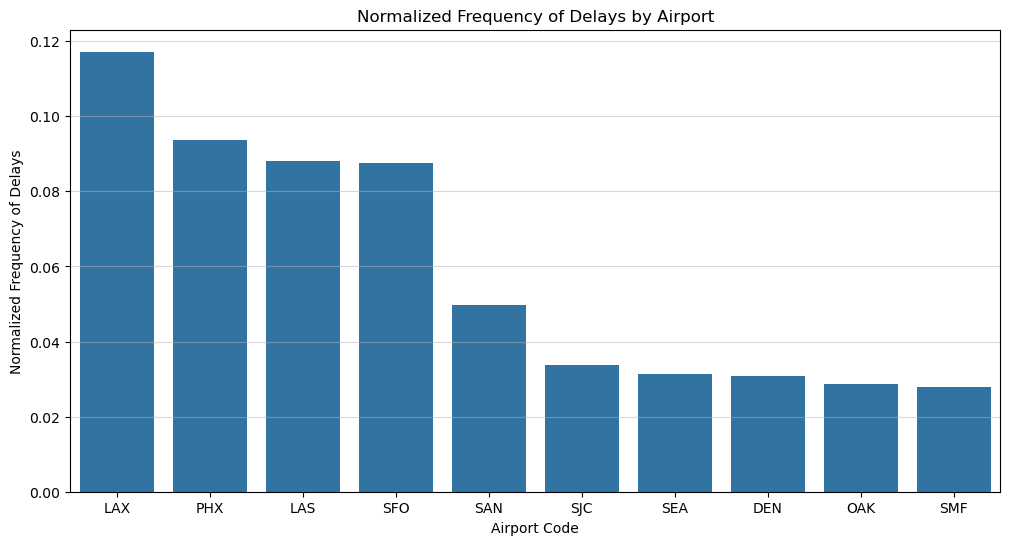

In [26]:
# Bar Chart (comparing delays across airports): Airport (ORIGIN; x-axis) & Normalized Frequency of Delays (DELAY; y-axis)
airport_delays = cleaned_df.groupby("ORIGIN")["ARR_DELAY"].count()
airport_norm_delays = airport_delays / airport_delays.sum()
top_ten_airports_norm_delays = airport_norm_delays.nlargest(10)

# display
plt.figure(figsize=(12, 6))
sns.barplot(x = top_ten_airports_norm_delays.index, y = top_ten_airports_norm_delays.values)
plt.xlabel("Airport Code")
plt.ylabel("Normalized Frequency of Delays")
plt.title("Normalized Frequency of Delays by Airport")
plt.xticks(rotation=360)
plt.grid(axis='y', alpha=0.5)
plt.show()

The analysis of airport delays shows that Los Angeles (LAX), Phoenix (PHX), San Francisco (SFO), and Las Vegas (LAS) have the highest frequencies of delays. Across these airports, approximately 8-12% of total flights experience delays, highlighting consistent congestion and operational challenges at these major hubs.

This approach normalizes airport delay frequencies by dividing the count of arrival delays at each airport by the total number of delays across all airports, ensuring a fair comparison regardless of airport size. By focusing on the top 10 airports with the highest normalized delays, the bar chart highlights which airports experience the most relative delays, providing insight into potential areas for operational improvement.

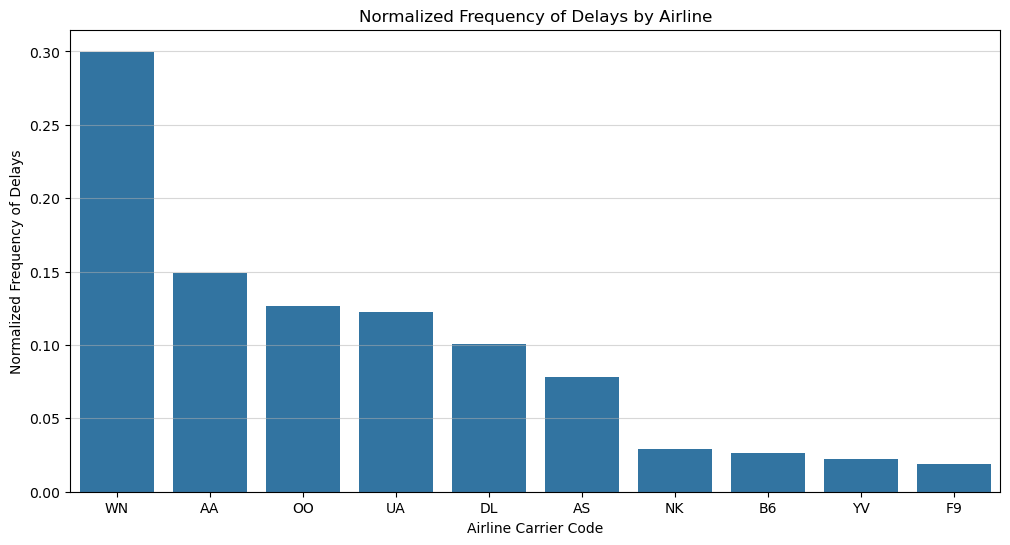

In [28]:
# Bar Chart (comparing delays across airlines): Airline (CARRIER_CODE; x-axis) & Normalized Frequency of Delays (DELAY; y-axis)
airline_delays = cleaned_df.groupby("CARRIER_CODE")["ARR_DELAY"].count()
airline_norm_delays = airline_delays / airline_delays.sum()
top_ten_airlines_norm_delays = airline_norm_delays.nlargest(10)

# display
plt.figure(figsize=(12, 6))
sns.barplot(x = top_ten_airlines_norm_delays.index, y = top_ten_airlines_norm_delays.values)
plt.xlabel("Airline Carrier Code")
plt.ylabel("Normalized Frequency of Delays")
plt.title("Normalized Frequency of Delays by Airline")
plt.xticks(rotation=360)
plt.grid(axis='y', alpha=0.5)
plt.show()

The analysis of airline delays reveals that Southwest Airlines (WN) experiences significantly more delays than other carriers, with approximately 29% of its total flights affected. American Airlines (AA) and United Airlines (UA) follow as the next most delayed airlines, with 12-15% of their flights experiencing delays. This trend suggests that while delays impact multiple airlines, Southwest faces the highest proportion of disruptions.

This approach normalizes the delay frequencies for each airline by dividing the count of arrival delays by the total number of delays across all airlines, enabling a fair comparison regardless of the airlines' size or flight volume. By focusing on the top 10 airlines with the highest normalized delays, the bar chart effectively highlights which airlines experience the most relative delays, offering insights into potential areas for operational improvements or service adjustments.

In [30]:
# Knowing the top 3 Airports and Airlines with most delays, now compare their distribution of delays with histograms
def arrival_delay_hist(df, airport=None, airline=None, bins=50):
    '''Creates histogram of arrival delays with optional filtering by airport or airline, and optional bins (default: 50)'''
    filtered_df = df.copy()
    # Filtering: Airport would include any arrivals or departures; airline would just be carrier_code
    if airport:
        filtered_df = filtered_df[(filtered_df["ORIGIN"] == airport) | (filtered_df["DEST"] == airport)]
    if airline:
        filtered_df = filtered_df[filtered_df["CARRIER_CODE"] == airline]
    print(f"Plotting for {airport if airport else airline}: {len(filtered_df)} rows")
    # Histogram display
    plt.figure(figsize=(10, 5))
    plt.hist(filtered_df["ARR_DELAY"].dropna(), bins=bins, edgecolor='black', alpha=0.7)
    title_filters = f" for {airline if airline else ''} {airport if airport else ''}".strip()
    plt.title(f"Arrival Delay Distribution {title_filters}")
    plt.xlabel("Arrival Delay (minutes)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.yscale("log")
    plt.show()

Plotting for LAX: 416333 rows


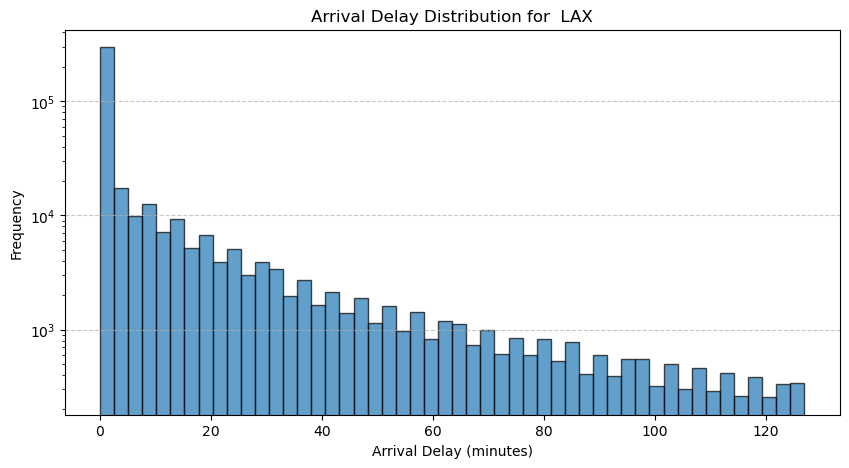

Plotting for SFO: 307016 rows


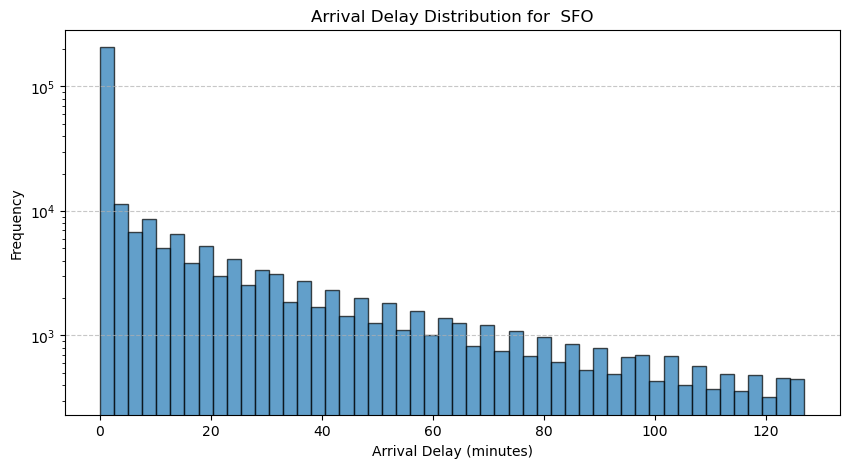

Plotting for LAS: 315463 rows


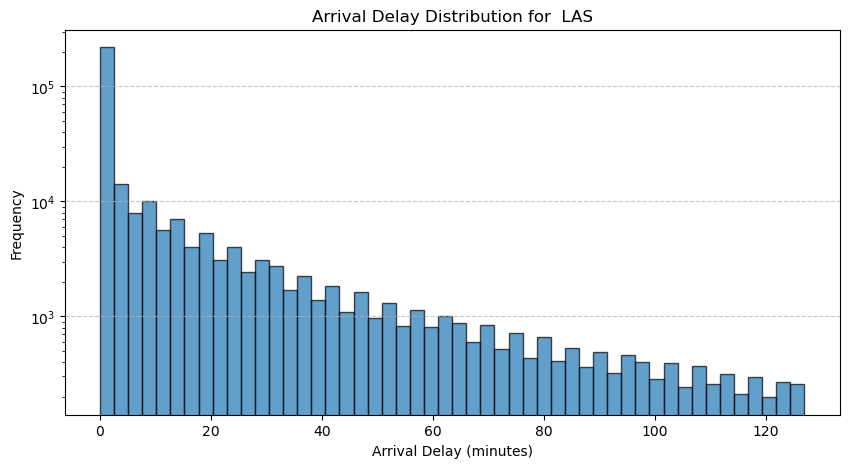

In [31]:
# Viewing airports delay (LAX, SFO, LAS) in one outputted layout:
arrival_delay_hist(cleaned_df, airport="LAX")
arrival_delay_hist(cleaned_df, airport="SFO")
arrival_delay_hist(cleaned_df, airport="LAS")

The delay distributions across the top airports exhibit a similar right-skewed pattern, with a sharp drop-off after 50 minutes. Median delay times vary, with SFO experiencing the longest at 37.5 minutes, followed by LAX at 30.0 minutes and LAS at 20.0 minutes. Notably, LAS has fewer extreme delays exceeding 24 hours compared to SFO and LAX, indicating that while all three airports face delays, the severity is generally lower at LAS.

This approach is effective for comparing the distribution of arrival delays by airport or airline because it allows for flexible filtering, enabling specific analysis of delays for particular airports or airlines. By using a histogram, the function provides a clear visualization of the frequency distribution of delays, helping to identify patterns such as skewness or outliers in the data. The use of a logarithmic scale for the y-axis is particularly useful when the delay data has a heavy right tail, as it highlights the spread of delays across a wide range of values without disproportionately emphasizing large delays. Additionally, the option to adjust the number of bins provides customization for the level of detail in the distribution. This approach ensures a targeted, insightful comparison of delay distributions for any chosen subset of the data.

Plotting for WN: 556915 rows


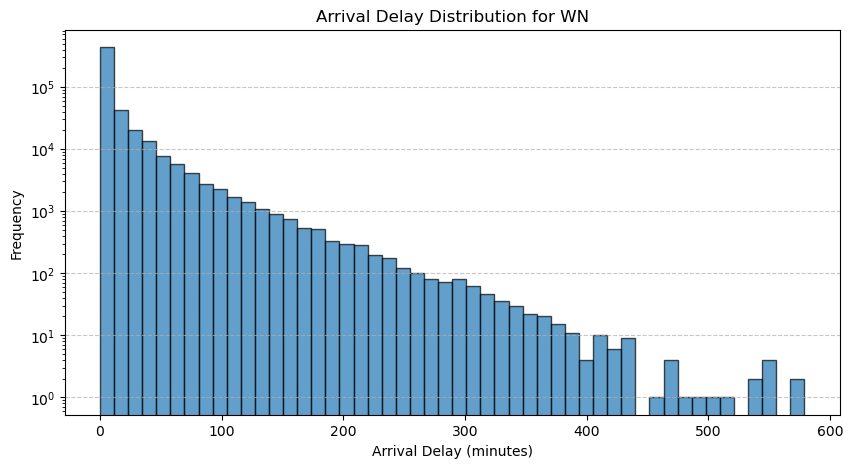

Plotting for AA: 286235 rows


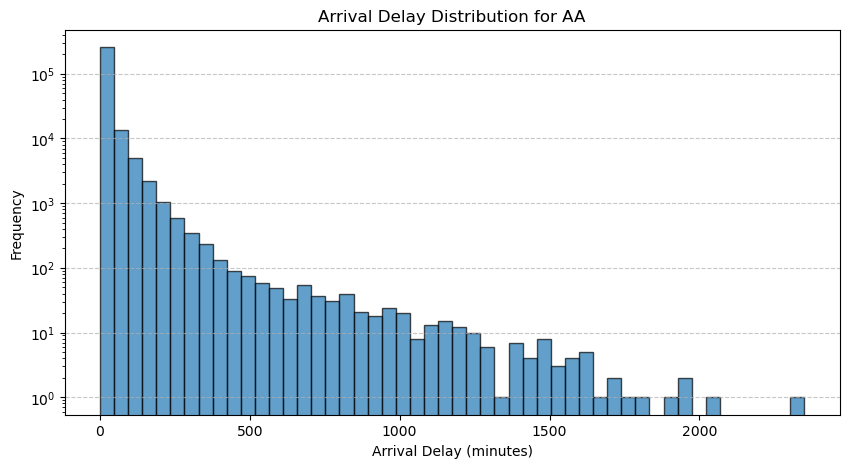

Plotting for UA: 235935 rows


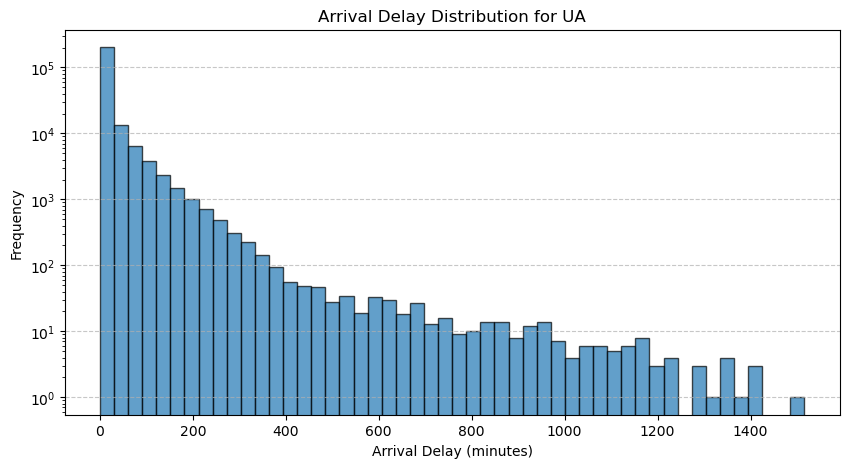

<Figure size 640x480 with 0 Axes>

In [33]:
# Compare top 3 airlines of their distribution of delays with histograms
arrival_delay_hist(df, airline="WN")
arrival_delay_hist(df, airline="AA")
arrival_delay_hist(df, airline="UA")
plt.tight_layout()

The delay distributions for the top airlines also follow a similar right-skewed pattern, with a sharp drop-off after 50 minutes. American Airlines (AA) experiences the longest median delay at 45.0 minutes, followed by United Airlines (UA) at 37.5 minutes, and Southwest Airlines (WN) with a much shorter median delay of 12.5 minutes. AA and UA are both affected by extreme outliers, with delays exceeding 1440 minutes (24 hours), which may indicate cancellations, diversions, or other severe operational issues. These outliers highlight more significant disruptions for these carriers compared to Southwest.

This approach effectively compares the delay distributions of the top three airlines (WN, AA, and UA) by visualizing their arrival delay frequencies with histograms. By isolating each airline’s data, it highlights the differences in how delays are spread across the airlines, enabling a clear comparison of their delay patterns. This method helps identify trends, such as whether some airlines experience more frequent smaller delays or larger, less frequent delays. By visualizing these distributions, the analysis can reveal potential operational differences between the airlines that may contribute to their delay frequencies.

In [35]:
# Line Chart of top 3 airports' with most delays (normalized) vs control (norm. sum of every other airport)
# Separate FL_Date into months, isolate top 3 airports, then normalize both
cleaned_df.loc[:, "FL_DATE"] = pd.to_datetime(cleaned_df["FL_DATE"])
top_3_airports = cleaned_df.groupby("ORIGIN")["DEP_DELAY"].sum().nlargest(3).index
t3aports_df = cleaned_df[cleaned_df["ORIGIN"].isin(top_3_airports)]

monthly_airport_delays = (
    t3aports_df.groupby([t3aports_df["FL_DATE"].dt.to_period("M"), "ORIGIN"])["DEP_DELAY"].sum() /
    t3aports_df.groupby([t3aports_df["FL_DATE"].dt.to_period("M"), "ORIGIN"])["FL_DATE"].count()).unstack()
monthly_all_airports_delay = (
    cleaned_df.groupby(cleaned_df["FL_DATE"].dt.to_period("M"))["DEP_DELAY"].sum() /
    cleaned_df.groupby(cleaned_df["FL_DATE"].dt.to_period("M"))["FL_DATE"].count())

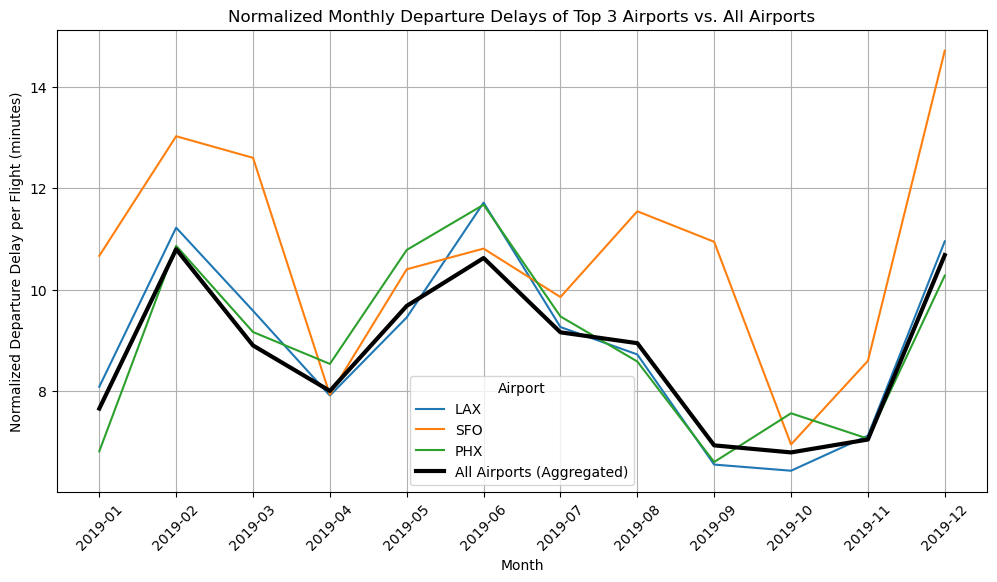

In [36]:
# Line Chart plot and display
plt.figure(figsize=(12, 6))
for airport in top_3_airports:
    plt.plot(monthly_airport_delays.index.astype(str), monthly_airport_delays[airport], label=airport)
plt.plot(monthly_all_airports_delay.index.astype(str), monthly_all_airports_delay.values, color="black", linewidth=3, label="All Airports (Aggregated)")
plt.xlabel("Month")
plt.ylabel("Normalized Departure Delay per Flight (minutes)")
plt.title("Normalized Monthly Departure Delays of Top 3 Airports vs. All Airports")
plt.xticks(rotation=45)
plt.legend(title="Airport")
plt.grid(True)
plt.show()

In 2019, San Francisco International Airport (SFO) experienced the highest overall departure delays, while Los Angeles International Airport (LAX) had the lowest. The trends for LAX and Phoenix Sky Harbor International Airport (PHX) were remarkably similar, often overlapping on the chart. February marked the peak delay for SFO, reaching 13 minutes, whereas the lowest delay was observed at LAX in October. Overall, the lowest delays occurred in October, while July saw the highest delays across all three airports.

This approach is useful for comparing the normalized departure delays of the top three airports with those of all other airports, providing a clear view of how the top airports perform relative to the general trend. By isolating the data by month and normalizing the delays (by dividing the total delays by the number of flights), the analysis ensures that the comparison is fair and adjusts for any differences in the number of flights between airports. The line chart allows for an easy comparison over time, showing how the delays evolve each month for the top three airports and the aggregate of all other airports. This visualization helps identify patterns, such as whether certain airports consistently experience higher delays or if there are periods when delays peak across all airports.

In [38]:
# Line Chart of top 3 airlines' with most delays (normalized) vs control (norm. sum of every other airline)
# Same process, but by airline this time
cleaned_df.loc[:, "FL_DATE"] = pd.to_datetime(cleaned_df["FL_DATE"])
top_3_airlines = cleaned_df.groupby("CARRIER_CODE")["DEP_DELAY"].sum().nlargest(3).index
t3alines_df = cleaned_df[cleaned_df["CARRIER_CODE"].isin(top_3_airlines)]

monthly_airline_delays = (
    t3alines_df.groupby([t3alines_df["FL_DATE"].dt.to_period("M"), "CARRIER_CODE"])["DEP_DELAY"].sum() /
    t3alines_df.groupby([t3alines_df["FL_DATE"].dt.to_period("M"), "CARRIER_CODE"])["FL_DATE"].count()).unstack()
monthly_all_airlines_delay = (
    cleaned_df.groupby(cleaned_df["FL_DATE"].dt.to_period("M"))["DEP_DELAY"].sum() /
    cleaned_df.groupby(cleaned_df["FL_DATE"].dt.to_period("M"))["FL_DATE"].count())

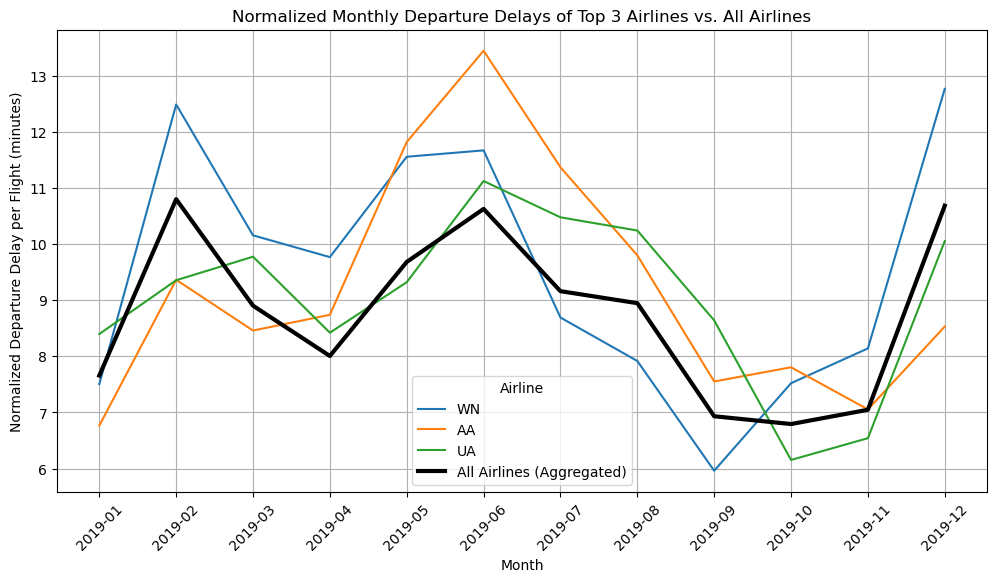

In [39]:
# Line Chart
plt.figure(figsize=(12, 6))
for airline in top_3_airlines:
    plt.plot(monthly_airline_delays.index.astype(str), monthly_airline_delays[airline], label=airline)
plt.plot(monthly_all_airlines_delay.index.astype(str), monthly_all_airlines_delay.values,
         color="black", linewidth=3, label="All Airlines (Aggregated)")
plt.xlabel("Month")
plt.ylabel("Normalized Departure Delay per Flight (minutes)")
plt.title("Normalized Monthly Departure Delays of Top 3 Airlines vs. All Airlines")
plt.xticks(rotation=45)
plt.legend(title="Airline")
plt.grid(True)
plt.show()

In 2019, American Airlines (AA) had the highest overall departure delays, peaking in July, while Southwest Airlines (WN) experienced the lowest delays in September. July saw elevated delays for all airlines, whereas the period from September through November had the lowest delays. Toward December, delays began to rise again. Throughout the year, United Airlines (UA) seems to of had lower delays compared to other major airlines.

This approach is designed to compare the normalized departure delays of the top three airlines with those of all other airlines, similar to the airport comparison. By isolating the data by month and normalizing the delays (by dividing the total delays by the number of flights), the analysis provides an accurate comparison that adjusts for variations in flight volume across airlines. The line chart enables a clear visualization of trends over time, showing how delays fluctuate for the top three airlines in contrast to the aggregated delays for all other airlines. This allows for identifying patterns in the performance of specific airlines, such as whether particular airlines consistently experience higher delays, and how their delays compare to the overall industry trend. This approach helps highlight areas where specific airlines may need to focus on improving operational efficiency.

# Question 3 — (20 points)

1.Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.

2.For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.

3.For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.

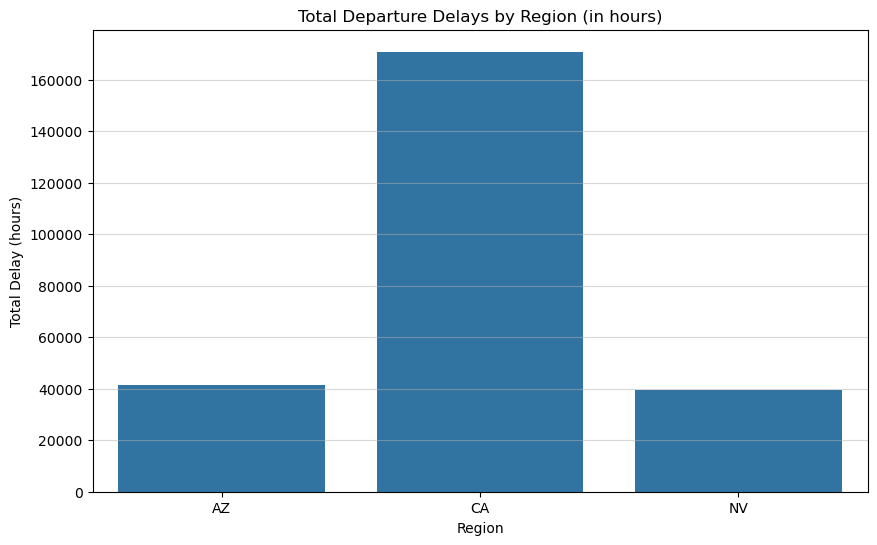

None


ORIGIN_ST
AZ     41407.08
CA    170881.82
NV     39415.87
Name: DEP_DELAY, dtype: float64

In [42]:
# Question 1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA)

# Filter data for the relevant regions (AZ, NV, CA)
regions_of_interest = ['AZ', 'NV', 'CA']
region_df = df[df['ORIGIN_ST'].isin(regions_of_interest)]

# Group by region and calculate the total delay for each region in hours
region_delays = round(region_df.groupby('ORIGIN_ST')['DEP_DELAY'].sum() / 60, 2)

# Plotting the total delays by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_delays.index, y=region_delays.values)
plt.title("Total Departure Delays by Region (in hours)")
plt.xlabel("Region")
plt.ylabel("Total Delay (hours)")
plt.grid(axis='y', alpha=0.5)
print(plt.show())
region_delays

The total departure delays in hours for the three states reveal significant differences. California (CA) experiences the highest total departure delay, with 170,881.82 hours, which is much greater than both Arizona (AZ) and Nevada (NV). This can be attributed to California's larger airport infrastructure, more frequent flights, and higher traffic volume, particularly from major airports like LAX and SFO. Arizona (AZ) follows with 41,407.08 hours, while Nevada (NV) has the lowest total departure delay at 39,415.87 hours. The variation in total departure delays suggests that factors such as airport size, flight volume, and regional demand for flights contribute to the overall delay patterns, with California's significant traffic driving the highest delays.

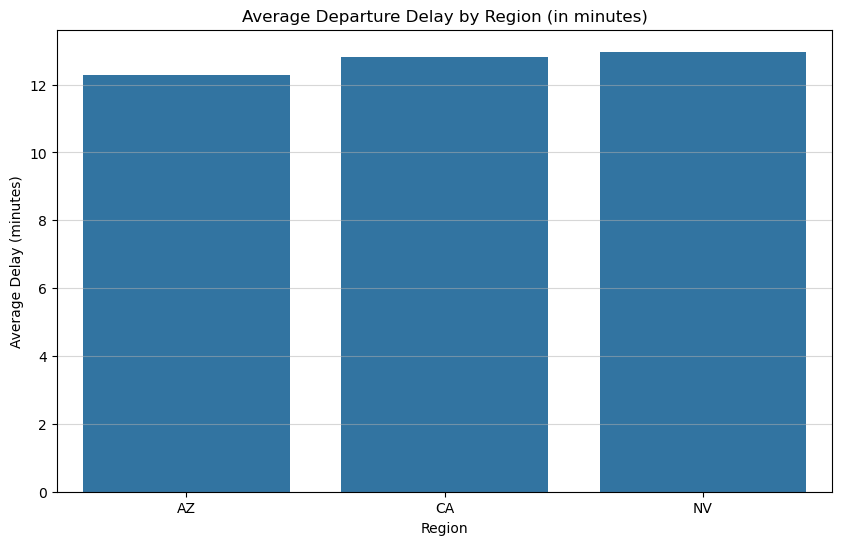

None


ORIGIN_ST
AZ    12.28
CA    12.80
NV    12.97
Name: DEP_DELAY, dtype: float64

In [44]:
# Calculate average delay per region
region_avg_delays = round(region_df.groupby('ORIGIN_ST')['DEP_DELAY'].mean(), 2)

# Plotting the average delays by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg_delays.index, y=region_avg_delays.values)
plt.title("Average Departure Delay by Region (in minutes)")
plt.xlabel("Region")
plt.ylabel("Average Delay (minutes)")
plt.grid(axis='y', alpha=0.5)
print(plt.show())
region_avg_delays

The average departure delays in minutes for the three states show a relatively narrow range, with Nevada (NV) having the highest average delay at 12.97 minutes, followed closely by California (CA) at 12.80 minutes, and Arizona (AZ) at 12.28 minutes. Despite California's larger total delay due to higher flight volume, its average delay is not significantly higher than Nevada's or Arizona's. This suggests that while California experiences more frequent delays due to its large airport traffic, the delays themselves are somewhat comparable to those in Nevada and Arizona. Nevada's slightly higher average delay may indicate some regional factors, such as less frequent, but potentially more disrupted, flights. Arizona's average delay is the lowest, possibly due to fewer flights or less congestion at its airports.

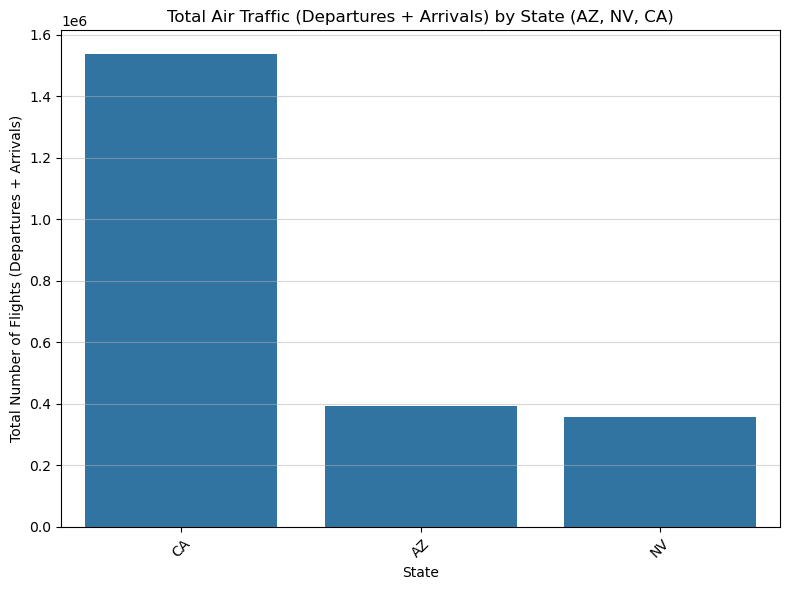

ORIGIN_ST
CA    1537416
AZ     392361
NV     355528
dtype: int64

In [46]:
# Question 1. Determine which region has the most air traffic

# Count 1) departures from each state, 2) then arrivals, 3) then combine, 4) sort in descending order
departures = cleaned_df.groupby('ORIGIN_ST').size()
arrivals = cleaned_df.groupby('DEST_ST').size()
states_of_interest = ['AZ', 'NV', 'CA']
departures = departures[departures.index.isin(states_of_interest)]
arrivals = arrivals[arrivals.index.isin(states_of_interest)]
total_flight_counts = departures.add(arrivals)
total_flight_counts = total_flight_counts.sort_values(ascending=False)

# display
plt.figure(figsize=(8, 6))
sns.barplot(x=total_flight_counts.index, y=total_flight_counts.values)
plt.title('Total Air Traffic (Departures + Arrivals) by State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Total Number of Flights (Departures + Arrivals)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
total_flight_counts

The analysis of air traffic across Arizona (AZ), Nevada (NV), and California (CA) reveals a significant disparity in flight volume. California has the highest total air traffic, with approximately 1,537,416 total flights (including both departures and arrivals), whereas Arizona and Nevada have significantly lower volumes at 392,361 and 355,528, respectively. This distribution is expected given that California is home to several major international airports, including Los Angeles International Airport (LAX), San Francisco International Airport (SFO), and San Diego International Airport (SAN). These airports serve as key domestic and international hubs, facilitating a much higher volume of flights compared to AZ and NV.

To assess which region has the most air traffic, I considered the total number of flights arriving and departing from each state. This metric provides a comprehensive measure of air traffic by capturing both inbound and outbound activity. Other potential metrics, such as flight duration or total distance traveled, could offer alternative perspectives, but they might not accurately represent the overall flight volume. By summing departures and arrivals, this approach accounts for passenger volume and airport activity, as airports with more flights tend to serve more passengers, increasing economic and logistical significance. Additionally, a state with more flights is more likely to have major hub airports facilitating domestic and international travel, making it a key part of the broader air travel network.

Overall, California dominates air traffic in the region, likely due to its large population, major business centers, and multiple international airports. Arizona and Nevada have significantly lower air traffic, though they still serve key airports such as Phoenix Sky Harbor (PHX) and Las Vegas McCarran (LAS), which are major domestic hubs. This analysis confirms that California is the most significant air traffic hub in this region, aligning with expectations based on population density, tourism, and business activity.

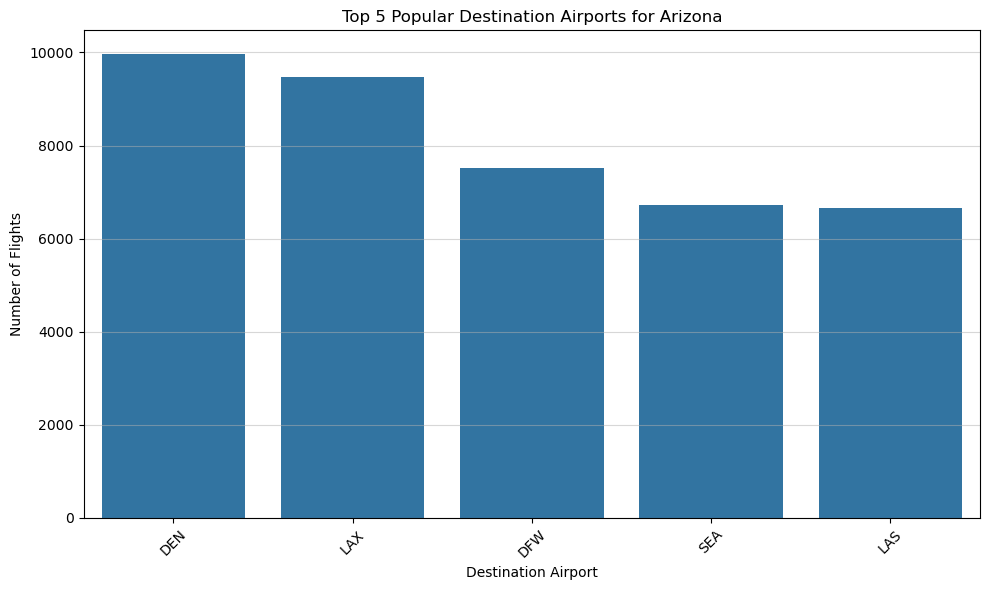

,DEST,Flight_Count
27,DEN,9976
58,LAX,9480
28,DFW,7519
110,SEA,6725
57,LAS,6648


In [48]:
# Question 2. Analyze the most popular outbound/destination airports in Arizona

# Filter data for Arizona State
az_flights = cleaned_df[cleaned_df['ORIGIN_ST'] == 'AZ']
# Group by destination and count the number of flights for each destination
destination_counts = az_flights.groupby('DEST').size().reset_index(name='Flight_Count')
top_five_destinations = destination_counts.nlargest(5, 'Flight_Count')

# display
plt.figure(figsize=(10, 6))
sns.barplot(x='DEST', y='Flight_Count', data=top_five_destinations)
plt.title('Top 5 Popular Destination Airports for Arizona')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
top_five_destinations

The analysis of outbound flights from Arizona (AZ) shows that the most popular destinations are Denver (DEN) with 9,976 flights, followed by Los Angeles (LAX) with 9,480 flights, Dallas/Fort Worth (DFW) with 7,519 flights, Seattle (SEA) with 6,725 flights, and Las Vegas (LAS) with 6,648 flights. These results suggest a strong demand for flights to major domestic cities, particularly in the West and Southwest regions.

Denver, with the highest flight count, is likely driven by both business and leisure travel. Los Angeles and Las Vegas are expected top destinations given Arizona's proximity to these tourist-heavy cities. The presence of Dallas/Fort Worth and Seattle further reflects a broader network of connections to major business hubs across the U.S.

The bar chart of these findings clearly shows Denver leading in outbound flights, followed by LAX, DFW, SEA, and LAS, highlighting the regional and national importance of these routes.

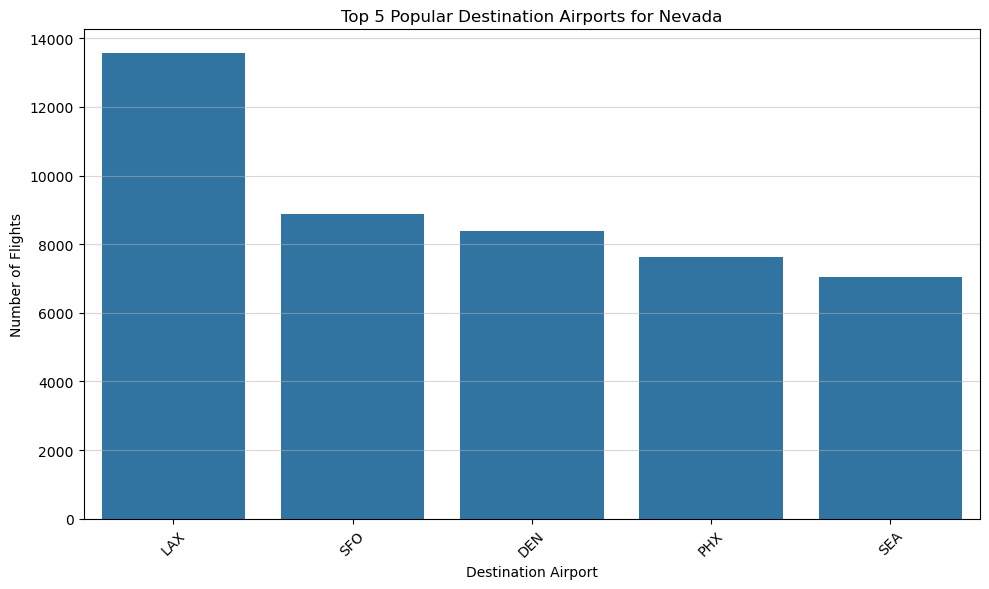

,DEST,Flight_Count
54,LAX,13580
99,SFO,8888
26,DEN,8388
83,PHX,7639
98,SEA,7040


In [50]:
#Question 2. Analyze the most popular outbound/destination airports in Nevada

# same protocol as above
nv_flights = cleaned_df[cleaned_df['ORIGIN_ST'] == 'NV']
destination_counts = nv_flights.groupby('DEST').size().reset_index(name='Flight_Count')
top_five_destinations = destination_counts.nlargest(5, 'Flight_Count')

# display
plt.figure(figsize=(10, 6))
sns.barplot(x='DEST', y='Flight_Count', data=top_five_destinations)
plt.title('Top 5 Popular Destination Airports for Nevada')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
top_five_destinations

The analysis of outbound flights from Nevada (NV) reveals that the top destinations are Los Angeles (LAX) with 13,580 flights, followed by San Francisco (SFO) with 8,888 flights, Denver (DEN) with 8,388 flights, Phoenix (PHX) with 7,639 flights, and Seattle (SEA) with 7,040 flights.

The prominence of LAX as the most popular destination is unsurprising, given the close proximity between Nevada and Southern California. The strong presence of San Francisco, Denver, and Phoenix reflects travel patterns that connect Nevada to major hubs in both the West Coast and Southwest. Seattle, being a popular business and tech hub, also draws significant air traffic from Nevada.

The bar chart visualizing these findings clearly shows LAX leading by a significant margin, with SFO and DEN following. This highlights Nevada's close ties to nearby West Coast cities and the continued importance of business and leisure connections to these locations.

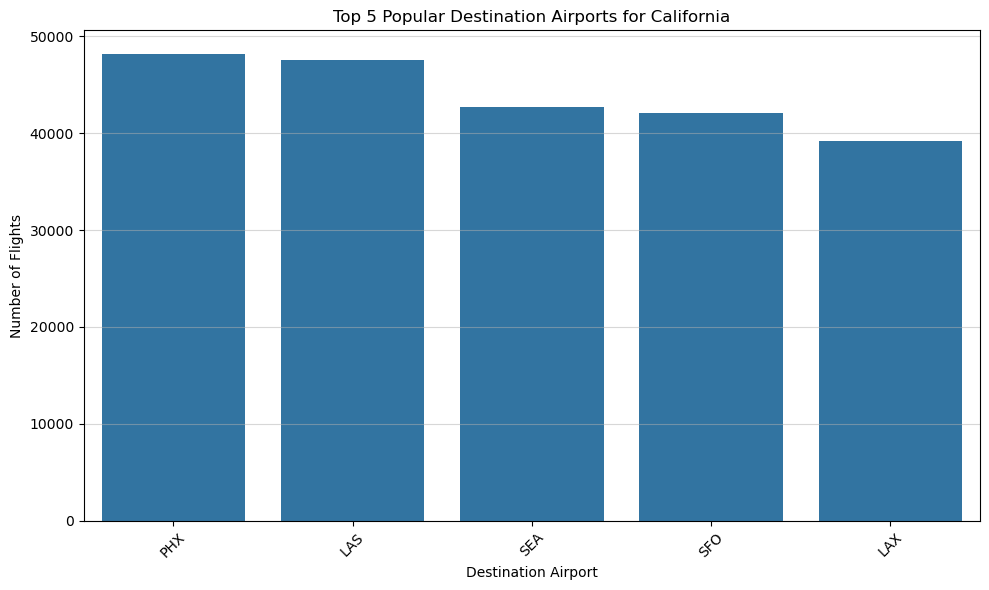

,DEST,Flight_Count
90,PHX,48201
59,LAS,47567
108,SEA,42648
109,SFO,42078
60,LAX,39208


In [52]:
# Question 2. Analyze the most popular outbound/destination airports in California

# same protocol as above
ca_flights = cleaned_df[cleaned_df['ORIGIN_ST'] == 'CA']
destination_counts = ca_flights.groupby('DEST').size().reset_index(name='Flight_Count')
top_five_destinations = destination_counts.nlargest(5, 'Flight_Count')

# display
plt.figure(figsize=(10, 6))
sns.barplot(x='DEST', y='Flight_Count', data=top_five_destinations)
plt.title('Top 5 Popular Destination Airports for California')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
top_five_destinations

The analysis of outbound flights from California (CA) shows that the most popular destinations are Phoenix (PHX) with 48,201 flights, Las Vegas (LAS) with 47,567 flights, San Francisco (SFO) with 42,648 flights, Seattle (SEA) with 42,078 flights, and Los Angeles (LAX) with 39,208 flights.

The high volume of flights to Phoenix and Las Vegas reflects strong regional travel between California and these neighboring cities, likely driven by tourism, business, and leisure activities. San Francisco and Seattle indicate business and tech-driven connections, while Los Angeles is also a major destination given California’s size and connectivity.

The bar chart clearly highlights the dominance of Phoenix and Las Vegas in outbound traffic from California, with SFO, SEA, and LAX following closely behind. These destinations showcase the mix of regional, business, and tourist-driven air travel from California.

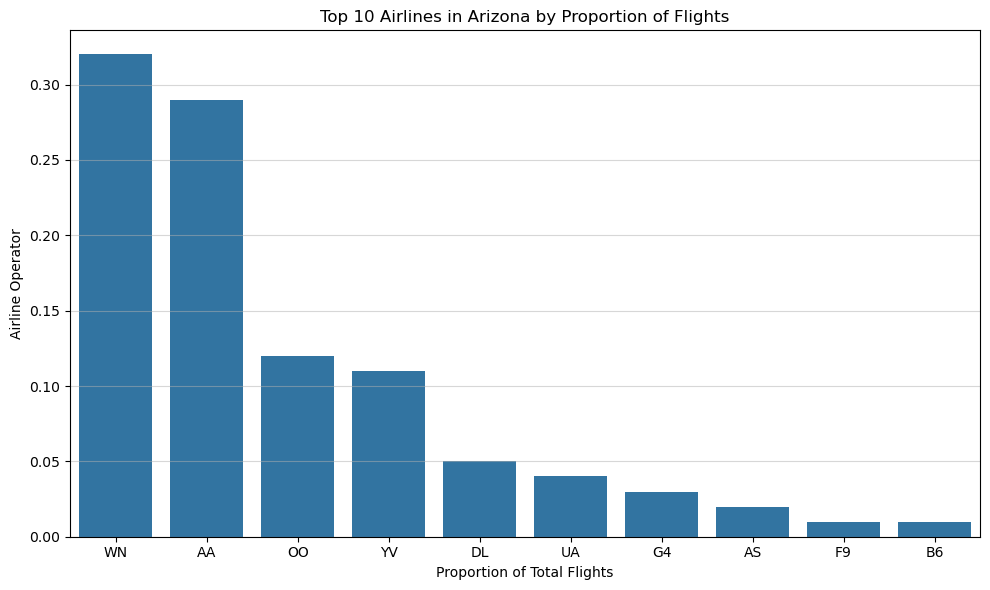

  CARRIER_CODE  Proportion
0           WN        0.32
1           AA        0.29
2           OO        0.12
3           YV        0.11
4           DL        0.05
5           UA        0.04
6           G4        0.03
7           AS        0.02
8           F9        0.01
9           B6        0.01


In [54]:
# Question 3. Calculate the proportion* of flights from each airline/operator in Arizona

# same protocol as above
az_flights = cleaned_df[cleaned_df['ORIGIN_ST'] == 'AZ']
az_airline_counts = az_flights['CARRIER_CODE'].value_counts(normalize=True).reset_index()
az_airline_counts.columns = ['CARRIER_CODE', 'Proportion']
top_10_az_airlines = round(az_airline_counts.nlargest(10, 'Proportion'), 2)

# display
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_az_airlines['Proportion'], x=top_10_az_airlines['CARRIER_CODE'])
plt.title('Top 10 Airlines in Arizona by Proportion of Flights')
plt.xlabel('Proportion of Total Flights')
plt.ylabel('Airline Operator')
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
print(top_10_az_airlines)

The analysis of the airline proportions for outbound flights from Arizona (AZ) reveals that Southwest Airlines (WN) holds the largest share with 0.32 of all flights, followed by American Airlines (AA) with 0.29. These two airlines dominate Arizona's air traffic, which is expected given their widespread routes and significant market presence.

Other notable airlines include SkyWest Airlines (OO) with 0.12, Mesa Air Group (YV) with 0.11, and Delta Airlines (DL) with 0.05. United Airlines (UA), Allegiant Air (G4), Alaska Airlines (AS), Frontier Airlines (F9), and JetBlue Airways (B6) round out the top 10, though with much smaller proportions of flights of 0.04, 0.03, 0.02, 0.01, and 0.01 respectively.

The bar chart visualizes this distribution, where the dominance of Southwest and American Airlines is clearly evident, while smaller carriers make up a fraction of the air traffic. This highlights the strong market share of major airlines like Southwest and American in Arizona, with regional and budget carriers serving a smaller but still significant portion of the state's outbound flights.

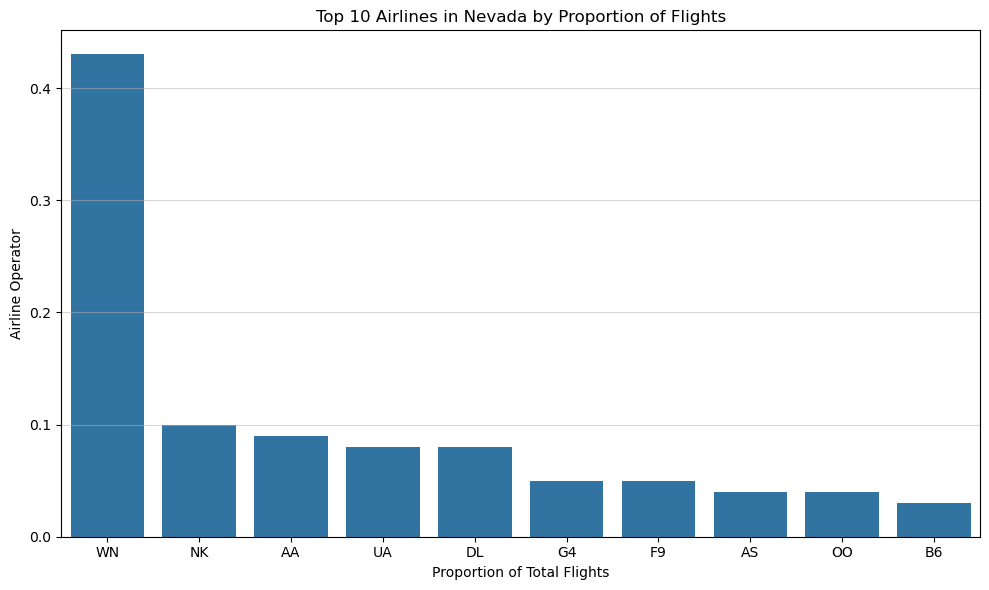

,CARRIER_CODE,Proportion
0,WN,0.43
1,NK,0.1
2,AA,0.09
3,UA,0.08
4,DL,0.08
5,G4,0.05
6,F9,0.05
7,AS,0.04
8,OO,0.04
9,B6,0.03


In [56]:
#Question 3. Calculate the proportion* of flights from each airline/operator in Nevada

# same protocol as above
nv_flights = cleaned_df[cleaned_df['ORIGIN_ST'] == 'NV']
nv_airline_counts = nv_flights['CARRIER_CODE'].value_counts(normalize=True).reset_index()
nv_airline_counts.columns = ['CARRIER_CODE', 'Proportion']
top_10_nv_airlines = round(nv_airline_counts.nlargest(10, 'Proportion'), 2)

# display
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_nv_airlines['Proportion'], x=top_10_nv_airlines['CARRIER_CODE'])
plt.title('Top 10 Airlines in Nevada by Proportion of Flights')
plt.xlabel('Proportion of Total Flights')
plt.ylabel('Airline Operator')
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
top_10_nv_airlines

The analysis of airline proportions for outbound flights from Nevada (NV) shows that Southwest Airlines (WN) leads with a dominant share of 0.43, followed by Spirit Airlines (NK) with 0.1, American Airlines (AA) with 0.09, and United Airlines (UA) with 0.08.

Southwest’s prominence aligns with its strong presence in both leisure and business markets, particularly in regional routes. Spirit Airlines, with a focus on low-cost travel, takes the second spot, which is indicative of Nevada's popularity for budget-conscious travelers. Delta Airlines (DL), Frontier Airlines (F9), Allegiant Air (G4), Alaska Airlines (AS), SkyWest Airlines (OO), and JetBlue Airways (B6) make up the remaining top 10 airlines, with smaller proportions of the total flights of 0.08 and under.

The bar chart visualizing this data shows the significant lead of Southwest Airlines, with other carriers like Spirit and American Airlines also holding notable portions of the air traffic. This suggests a mix of low-cost and legacy carriers dominating Nevada's air travel market.

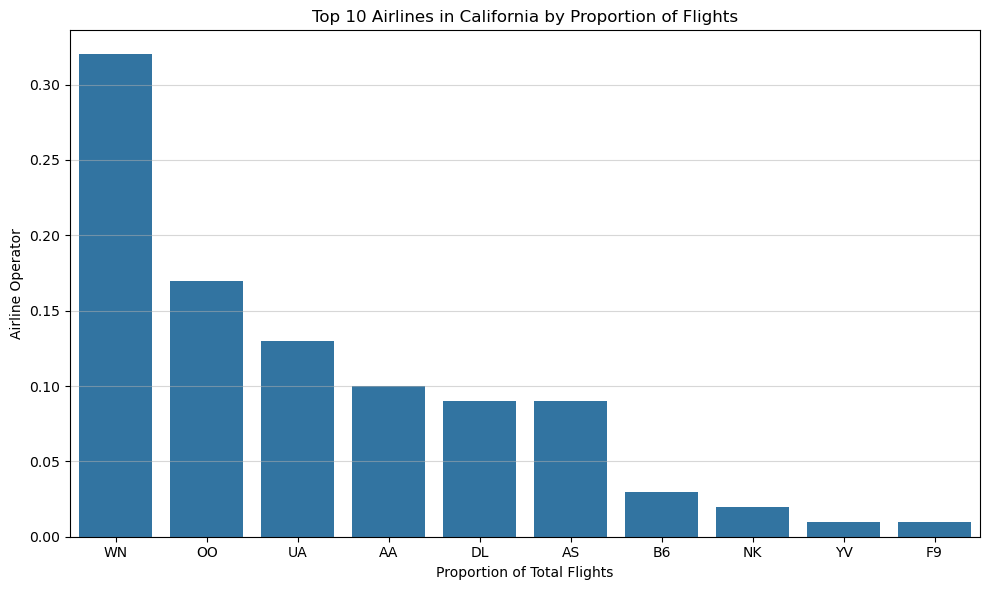

,CARRIER_CODE,Proportion
0,WN,0.32
1,OO,0.17
2,UA,0.13
3,AA,0.1
4,DL,0.09
5,AS,0.09
6,B6,0.03
7,NK,0.02
8,YV,0.01
9,F9,0.01


In [58]:
#Question 3. Calculate the proportion* of flights from each airline/operator in California

# same protocol, now visualize by proportion
ca_flights = cleaned_df[cleaned_df['ORIGIN_ST'] == 'CA']
ca_airline_counts = ca_flights['CARRIER_CODE'].value_counts(normalize=True).reset_index()
ca_airline_counts.columns = ['CARRIER_CODE', 'Proportion']
top_10_ca_airlines = round(ca_airline_counts.nlargest(10, 'Proportion'), 2)

# display
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_ca_airlines['Proportion'], x=top_10_ca_airlines['CARRIER_CODE'])
plt.title('Top 10 Airlines in California by Proportion of Flights')
plt.xlabel('Proportion of Total Flights')
plt.ylabel('Airline Operator')
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()
top_10_ca_airlines

The airline proportion analysis for outbound flights from California (CA) shows that Southwest Airlines (WN) leads with 0.32 of the market, followed by SkyWest Airlines (OO) at 0.17. United Airlines (UA) holds 0.13, and American Airlines (AA) accounts for 0.1. These top four carriers represent a significant share of California’s air traffic, with Southwest continuing to dominate, supported by SkyWest, which operates many regional flights.

Delta Airlines (DL) and Alaska Airlines (AS) also have notable shares, with 0.09 and 0.09, respectively. Other carriers like JetBlue Airways (B6), Spirit Airlines (NK), Mesa Air Group (YV), and Frontier Airlines (F9) have much smaller proportions, each under 5%.

The bar chart illustrates the strong presence of Southwest and SkyWest in California, with a mix of both legacy and regional carriers serving the state. This pattern reflects California’s major air traffic volume, where both large carriers and regional airlines play crucial roles in meeting the demand for a variety of routes.

When comparing the airline proportions across Arizona, Nevada, and California, a clear pattern emerges. Southwest Airlines (WN) dominates all three states, with the largest share in both Arizona (0.32) and California (0.32) and a slightly higher share in Nevada (0.43). This suggests that Southwest is a major player in regional air traffic across the western U.S., especially for budget-conscious travelers.

# Question 4 — Finding Patterns (20 points)

1.Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.

2.Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.


In [62]:
# Question 4: PART 1
df.head(50)

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947
5,2019-10-01,AA,N816NN,2339,PHX,AZ,JFK,NY,911.0,0.0,1702.0,0.0,291.0,2153
6,2019-10-01,AA,N150NN,2349,LAX,CA,BOS,MA,2149.0,0.0,559.0,0.0,310.0,2611
7,2019-10-01,AA,N994AN,2354,LAX,CA,DFW,TX,1128.0,0.0,1620.0,0.0,172.0,1235
8,2019-10-01,AA,N404AN,2361,LAX,CA,MCO,FL,754.0,0.0,1546.0,0.0,292.0,2218
9,2019-10-01,AA,N134AN,2364,ORD,IL,LAX,CA,1701.0,1.0,1916.0,0.0,255.0,1744


The two patterns that stood out to me was departure and arrival times and flight length and delay correlation. The dataset has both scheduled and actual departure and arrival times, and there's a clear distinction between the two. Most rows have delays in departure and arrival. A pattern that is noticeable is that flights, especially those with longer routes or early departures, tend to have higher delays, while shorter flights or those with less busy times have fewer delays. This could suggest a trend of delays being more frequent in specific times or flight routes. Then for flight length and delay correlation, there's a correlation between the elapsed_time and the delay values. Longer flights, tend to have greater delays, but this doesn't always hold true. However, in general, flights with longer durations seem to accumulate more delays than shorter ones.

In [64]:
# Question 4: PART 2

#group by carrier and calculate delay statistics
carrier_delays = cleaned_df.groupby("CARRIER_CODE").agg(
    min_dep_delay=("DEP_DELAY", "min"),
    max_dep_delay=("DEP_DELAY", "max"),
    avg_dep_delay=("DEP_DELAY", "mean"),
    min_arr_delay=("ARR_DELAY", "min"),
    max_arr_delay=("ARR_DELAY", "max"),
    avg_arr_delay=("ARR_DELAY", "mean")
).reset_index()
carrier_delays

,CARRIER_CODE,min_dep_delay,max_dep_delay,avg_dep_delay,min_arr_delay,max_arr_delay,avg_arr_delay
0,AA,0.0,171.0,9.235099,0.0,127.0,9.038220
1,AS,0.0,169.0,7.797553,0.0,127.0,8.607514
2,B6,0.0,167.0,9.458730,0.0,127.0,7.952663
3,DL,0.0,176.0,7.006731,0.0,127.0,6.513484
4,EV,0.0,93.0,6.901099,0.0,84.0,8.395604
5,F9,0.0,170.0,13.660477,0.0,127.0,12.623960
6,G4,0.0,164.0,8.038179,0.0,127.0,8.650488
7,HA,0.0,165.0,7.983078,0.0,127.0,9.470010
8,MQ,0.0,135.0,7.957094,0.0,125.0,7.459382
9,NK,0.0,177.0,8.359337,0.0,127.0,8.005900


In this analysis, we looked at the minimum, maximum, and average arrival and departure delays for each airline. Most airlines have a minimum departure delay of 0 minutes, meaning some flights leave on time, but delays still happen on other flights. The longest departure delay we see is with Spirit Airlines (NK)having a maximum of 177 minutes. On average, Frontier Airlines (F9) has the highest departure delay of 13.66 minutes, while EVA Airlines (EV) and Republic Airways (YX) have lower delays around 7 minutes. For arrivals, most airlines also have a minimum arrival delay of 0 minutes, but delays can still happen. The longest arrival delays reach 127 minutes, which can cause big issues, especially for connecting flights. Frontier Airlines (F9) has the highest average arrival delay at 12.62 minutes, while Delta (DL) and Envoy (MQ) Airlines have lower delays around 6.5 to 7.4 minutes.

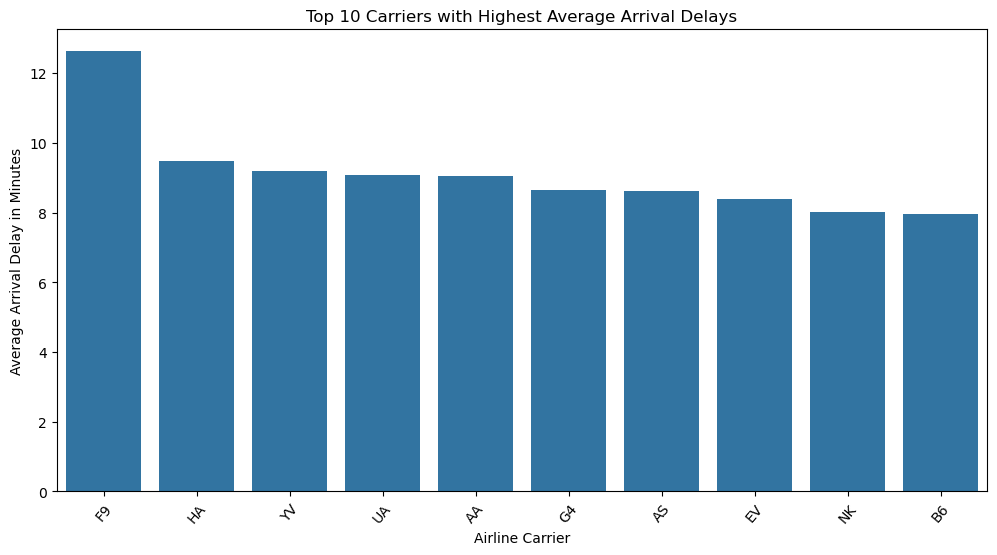

Top 10 carriers with highest average arrival delays:


,CARRIER_CODE,min_dep_delay,max_dep_delay,avg_dep_delay,min_arr_delay,max_arr_delay,avg_arr_delay
5,F9,0.0,170.0,13.66,0.0,127.0,12.62
7,HA,0.0,165.0,7.98,0.0,127.0,9.47
13,YV,0.0,157.0,9.03,0.0,127.0,9.18
11,UA,0.0,176.0,9.06,0.0,127.0,9.08
0,AA,0.0,171.0,9.24,0.0,127.0,9.04
6,G4,0.0,164.0,8.04,0.0,127.0,8.65
1,AS,0.0,169.0,7.80,0.0,127.0,8.61
4,EV,0.0,93.0,6.90,0.0,84.0,8.40
9,NK,0.0,177.0,8.36,0.0,127.0,8.01
2,B6,0.0,167.0,9.46,0.0,127.0,7.95


In [66]:
#sort carriers by highest average arrival delay
top_10_delayed_carriers = carrier_delays.sort_values(by = "avg_arr_delay", ascending = False).head(10).round(2)

# plots the top 10 carriers with the highest average arrival delays
plt.figure(figsize = (12, 6))
sns.barplot(x = "CARRIER_CODE", y = "avg_arr_delay", data = top_10_delayed_carriers)
plt.xlabel("Airline Carrier")
plt.ylabel("Average Arrival Delay in Minutes")
plt.title("Top 10 Carriers with Highest Average Arrival Delays")
plt.xticks(rotation = 50)
plt.show()

print("Top 10 carriers with highest average arrival delays:")
top_10_delayed_carriers.head(10)

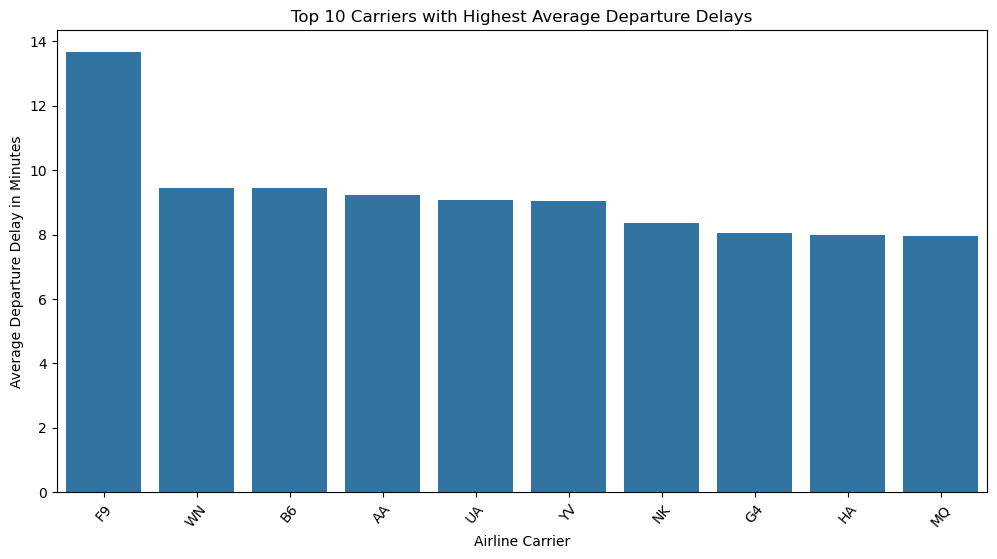

Top 10 carriers with highest average departure delays:


,CARRIER_CODE,min_dep_delay,max_dep_delay,avg_dep_delay,min_arr_delay,max_arr_delay,avg_arr_delay
5,F9,0.0,170.0,13.66,0.0,127.0,12.62
12,WN,0.0,172.0,9.46,0.0,127.0,7.72
2,B6,0.0,167.0,9.46,0.0,127.0,7.95
0,AA,0.0,171.0,9.24,0.0,127.0,9.04
11,UA,0.0,176.0,9.06,0.0,127.0,9.08
13,YV,0.0,157.0,9.03,0.0,127.0,9.18
9,NK,0.0,177.0,8.36,0.0,127.0,8.01
6,G4,0.0,164.0,8.04,0.0,127.0,8.65
7,HA,0.0,165.0,7.98,0.0,127.0,9.47
8,MQ,0.0,135.0,7.96,0.0,125.0,7.46


In [67]:
# sort carriers by highest average arrival delay
top_10_delayed_carriers = carrier_delays.sort_values(by = "avg_dep_delay", ascending = False).head(10).round(2)

# plots the top 10 carriers with the highest average arrival delays
plt.figure(figsize = (12, 6))
sns.barplot(x = "CARRIER_CODE", y = "avg_dep_delay", data = top_10_delayed_carriers)
plt.xlabel("Airline Carrier")
plt.ylabel("Average Departure Delay in Minutes")
plt.title("Top 10 Carriers with Highest Average Departure Delays")
plt.xticks(rotation = 50)
plt.show()

print("Top 10 carriers with highest average departure delays:")
top_10_delayed_carriers.head(10)

The analysis of flight delays for the top 10 airlines revealed notable patterns in both departure and arrival delays. For both departure and arrival delays, F9 stands out with the highest average delays, especially in departure delays, where it recorded an average of 13.66 minutes. Other airlines with high departure delays include WN, B6, and AA, all averaging between 9 and 10 minutes. In terms of arrival delays, F9 also experienced significant delays, with an average of 12.62 minutes, while HA and YV had relatively lower average arrival delays, around 9 minutes. The data suggests that carriers like F9 and WN tend to experience more significant delays, especially during departures, while others like HA and YV manage to maintain lower delays. Additionally, airlines with longer departure delays generally experience similar trends in arrival delays.

The carriers most prone to arrival delays are Frontier Airlines (F9), Hawaiian Airlines (HA), and Mesa Airlines (YV) based on their high average arrival delays at 12.62 minutes, 9.47 minutes, and 9.18 minutes respectively.

The carriers most prone to departure delays are Frontier Airlines (F9), Southwest Airlines (WN), and JetBlue (B6) based on their high average departure delays at 13.66, 9.46, and 9.45 respectively.

The reason we choose a bar graph was because it effectively compares the average delays across different airlines, which are categorical variables. The descending order of the bars makes it easy to identify which airlines experience the most significant delays, allowing for us to quickly interpret. Additionally, the bar graph provides a clear and simple visualization that avoids unnecessary complexity, making it easier for presenting data to an audience.

Top 10 states with highest average arrival delays:


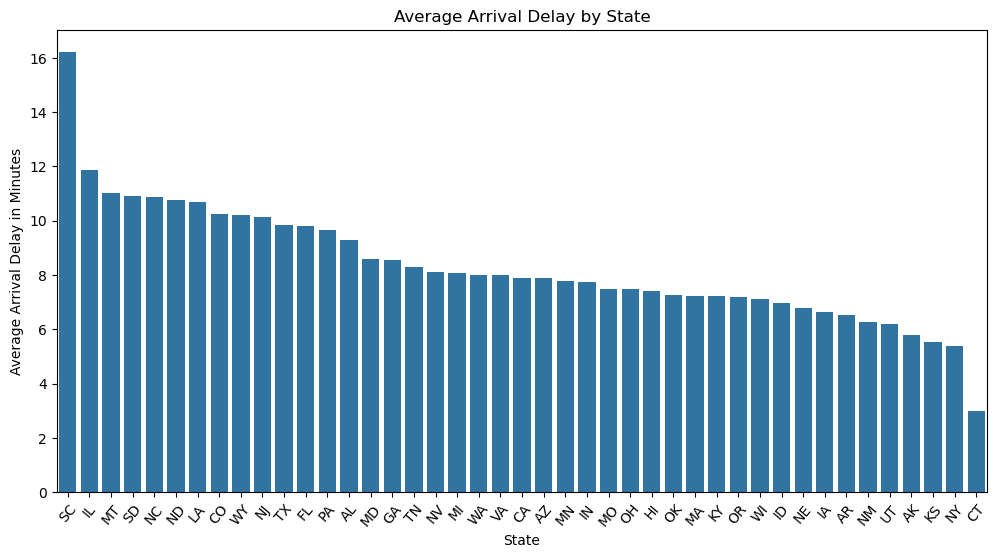

In [70]:
# explores the departure delays by region
region_delays = cleaned_df.groupby("ORIGIN_ST")["ARR_DELAY"].mean().reset_index()
# sorts by DEP_DELAY in descending order to get the top 10 states with the highest departure delays
region_delays_sorted = region_delays.sort_values("ARR_DELAY", ascending=False)
print("Top 10 states with highest average arrival delays:")
region_delays_sorted.head(10)

# display
plt.figure(figsize=(12, 6))
sns.barplot(x="ORIGIN_ST", y="ARR_DELAY", data=region_delays_sorted)
plt.xlabel("State")
plt.ylabel("Average Arrival Delay in Minutes")
plt.title("Average Arrival Delay by State")
plt.xticks(rotation=50)
plt.show()

Top 10 states with highest average departure delays:


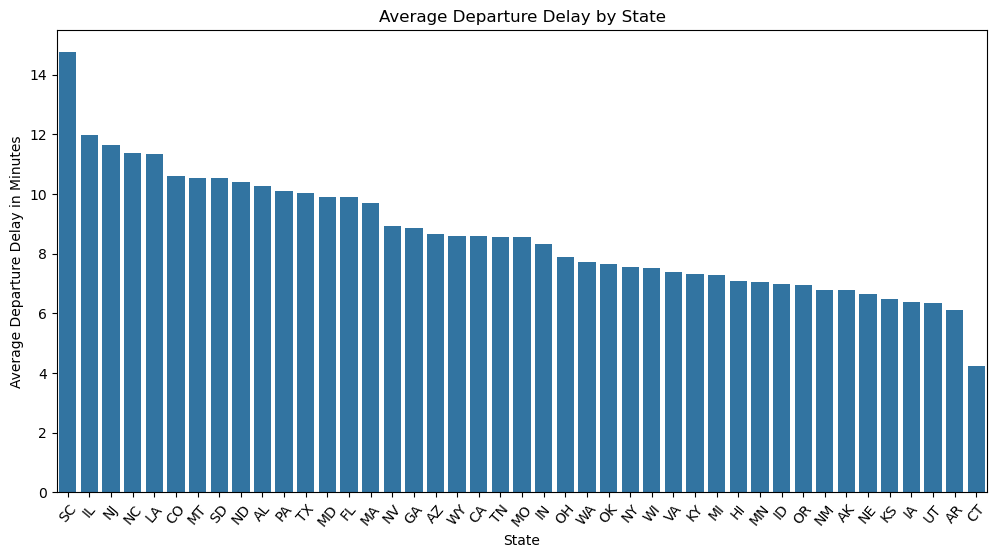

In [71]:
# explores departure delays by region
region_delays = cleaned_df.groupby("ORIGIN_ST")["DEP_DELAY"].mean().reset_index()
# sorts by DEP_DELAY in descending order to get the top 10 states with the highest departure delays
region_delays_sorted = region_delays.sort_values("DEP_DELAY", ascending=False)
print("Top 10 states with highest average departure delays:")
region_delays_sorted.head(10)

# display
plt.figure(figsize=(12, 6))
sns.barplot(x="ORIGIN_ST", y="DEP_DELAY", data=region_delays_sorted)
plt.xlabel("State")
plt.ylabel("Average Departure Delay in Minutes")
plt.title("Average Departure Delay by State")
plt.xticks(rotation=50)
plt.show()

Based on the diagram for avergae arrival delays, South Carolina (SC), Illinois (IL), and Montana (MT) experience the highest average arrival delays. These delays may be influenced by a combination of factors such as airport congestion, weather conditions, or airline performance. Additionally, North Carolina (NC), North Dakota (ND), and Louisiana (LA) also show significant delays, suggesting that certain regional factors such as connecting flight schedules or operational inefficiencies may be contributing to these patterns.


Based on the diagram for average departure delays, South Carolina (SC), Illinois (IL), and New Jersey (NJ) have the highest average delays, indicating possible congestion or operational issues at major airports in these states. Additionally, North Carolina (NC), Louisiana (LA), and Colorado (CO) also experience frequent departure delays, which could be related to high passenger volume or delays in aircraft turnaround times. Having the presence of Alabama (AL) and Montana (MT) in the top 10 suggests that delays are not limited to the largest hub airports but also impact smaller airports with fewer scheduling cushion.

The reason we choose a bar graph was because it allows for easy comparison of average delays across different states. Since each state is a categorical variable, this visualization makes it simple to identify regional trends and determine which areas experience the most frequent delays. By sorting the bars in descending order, the visualization becomes easier allowing us to see the most delay-prone states.

# Question 5 — (30 points)

1.Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".

2.For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

Top 10 Best Performing Airlines (Based on Combined Delay):
   CARRIER_CODE  avg_dep_delay  avg_arr_delay  combined_delay
3            DL       7.006731       6.513484           13.52
14           YX       7.432432       7.648649           15.08
10           OO       7.526150       7.697659           15.22
4            EV       6.901099       8.395604           15.30
8            MQ       7.957094       7.459382           15.42
9            NK       8.359337       8.005900           16.37
1            AS       7.797553       8.607514           16.41
6            G4       8.038179       8.650488           16.69
12           WN       9.459000       7.719655           17.18
2            B6       9.458730       7.952663           17.41


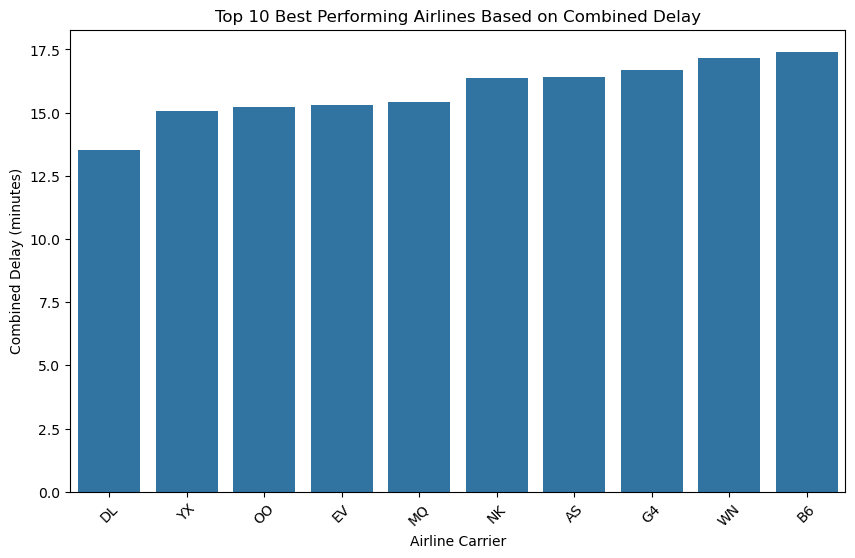

In [74]:
# Group by carrier and calculate the min, max, and average delays for departure and arrival
carrier_delays = cleaned_df.groupby("CARRIER_CODE").agg(
    min_dep_delay=("DEP_DELAY", "min"),
    max_dep_delay=("DEP_DELAY", "max"),
    avg_dep_delay=("DEP_DELAY", "mean"),
    min_arr_delay=("ARR_DELAY", "min"),
    max_arr_delay=("ARR_DELAY", "max"),
    avg_arr_delay=("ARR_DELAY", "mean")
).reset_index()

#Calculate combined delay (sum of average departure delay and average arrival delay)
carrier_delays['combined_delay'] = round((carrier_delays['avg_dep_delay'] + carrier_delays['avg_arr_delay']), 2)

#Sort the airlines by the combined delay (lower is better)
sorted_carrier_delays = carrier_delays.sort_values(by='combined_delay', ascending=True)

#Display the top 10 best performing airlines based on combined delay
top_10_best_performing_airlines = sorted_carrier_delays.head(10)

#Display the results
print("Top 10 Best Performing Airlines (Based on Combined Delay):")
print(top_10_best_performing_airlines[['CARRIER_CODE', 'avg_dep_delay', 'avg_arr_delay', 'combined_delay']])

#Visualize the top 10 airlines based on combined delay
plt.figure(figsize=(10, 6))
sns.barplot(x='CARRIER_CODE', y='combined_delay', data=top_10_best_performing_airlines)
plt.xlabel('Airline Carrier')
plt.ylabel('Combined Delay (minutes)')
plt.title('Top 10 Best Performing Airlines Based on Combined Delay')
plt.xticks(rotation=45)
plt.show()

The top 10 best-performing airlines, based on combined delays, show a range of performance in terms of average departure and arrival delays. Delta Airlines (DL) stands out with the lowest combined delay of 13.52 minutes, indicating a more consistent and timely performance compared to the other carriers. On the other end, JetBlue (B6) has the highest combined delay of 17.41 minutes, suggesting relatively more delays in both departures and arrivals. Other notable performers include Spirit Airlines (NK) and Southwest Airlines (WN), which both have delays over 16 minutes on average, highlighting areas for potential improvement. Airlines like Envoy Air (EV) and Mesa Air Group (MQ) also show competitive performance, staying below 15.5 minutes for their combined delays.

The analysis prioritizes combined delay as a measure of overall airline performance, considering both departure and arrival delays. A lower combined delay indicates better punctuality and operational efficiency. The rationale behind using this metric is that passengers value timely departures and arrivals, and airlines that manage both aspects well are perceived as higher-performing. This method effectively identifies the airlines that are best at minimizing delays and maintaining consistent schedules across both flight stages.

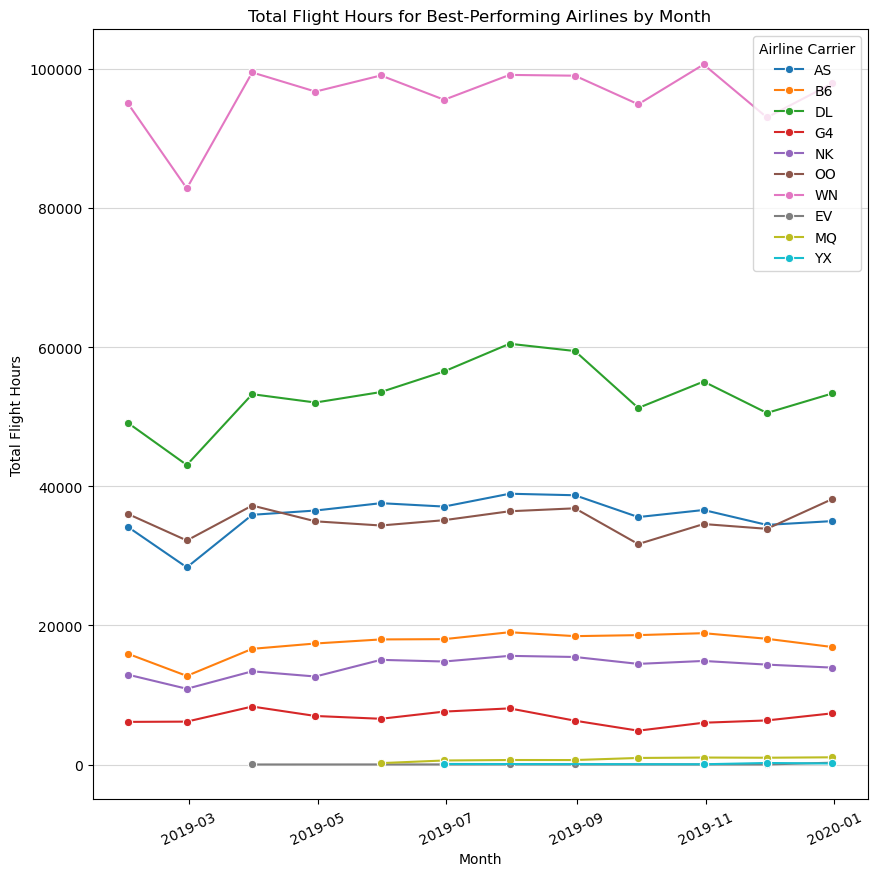

In [76]:
# Change elapsed time in minutes to hours
cleaned_df['FLIGHT_HOURS'] = cleaned_df['ELAPSED_TIME'] / 60
# Group by airline carrier and month, plot top 10
monthly_flight_hours = cleaned_df.groupby([pd.Grouper(key='FL_DATE', freq='ME'), 'CARRIER_CODE'])['FLIGHT_HOURS'].sum().reset_index()
best_performing_airlines = top_10_best_performing_airlines['CARRIER_CODE'].tolist()
filtered_flight_hours = monthly_flight_hours[monthly_flight_hours['CARRIER_CODE'].isin(best_performing_airlines)]

# display
plt.figure(figsize=(10, 10))
sns.lineplot(data=filtered_flight_hours, x='FL_DATE', y='FLIGHT_HOURS', hue='CARRIER_CODE', marker='o')
plt.title('Total Flight Hours for Best-Performing Airlines by Month')
plt.xlabel('Month')
plt.ylabel('Total Flight Hours')
plt.xticks(rotation=25)
plt.legend(title='Airline Carrier')
plt.grid(axis='y', alpha=0.5)
plt.show()

The analysis of total flight hours for the top 10 best-performing airlines shows that Southwest Airlines (WN) operates the highest number of flight hours per month, ranging between 80,000 to 100,000 hours, indicating its extensive flight network and operational scale. Delta Air Lines (DL) follows as the second-highest, with 40,000 to 60,000 hours per month, suggesting a strong but more balanced operational footprint. SkyWest Airlines (OO) and Alaska Airlines (AS) maintain similar levels, each averaging around 30,000 hours monthly, while JetBlue Airways (B6) operates at a moderate 20,000 hours. Spirit Airlines (NK) follows with approximately 15,000 hours, and Allegiant Air (G4) at around 10,000 hours, highlighting their relatively smaller but still significant presence. The remaining airlines, Republic Airways (YX), Envoy Air (MQ), and ExpressJet Airlines (EV), record much lower total flight hours, reflecting their more limited operations, possibly as regional carriers or those with niche market focuses. Across all airlines, there is a noticeable dip in March, suggesting seasonal or operational adjustments. Additionally, Southwest (WN) and Delta (DL) display significantly more variability in their flight hours compared to the other eight airlines, indicating their flexibility in scaling operations based on demand, whereas the smaller carriers maintain more consistent scheduling patterns. This ranking aligns with performance based on minimal delays, showing that operational efficiency is not solely dependent on total flight volume but rather on effective scheduling and execution.

# Question 6 — (20 points)

Select any THREE (3) aircrafts, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.

2. Arrival and departure delays at the airports where it traveled.

3. Create summary statistics on the distance traveled.

Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.

**Note: the TAIL_NUM can help you to identify each unique aircraft.**


In [79]:
random_3_aircraft = ['N8557Q', 'N420UA', 'N111ZM']


Analysis for Aircraft N8557Q:

Airline: WN
Most Frequent Routes:
     ORIGIN DEST  flights
121    MDW  LAS       11
284    STL  PHX       10
85     LAS  PHX       10
190    PHX  MDW        9
70     LAS  DAL        8


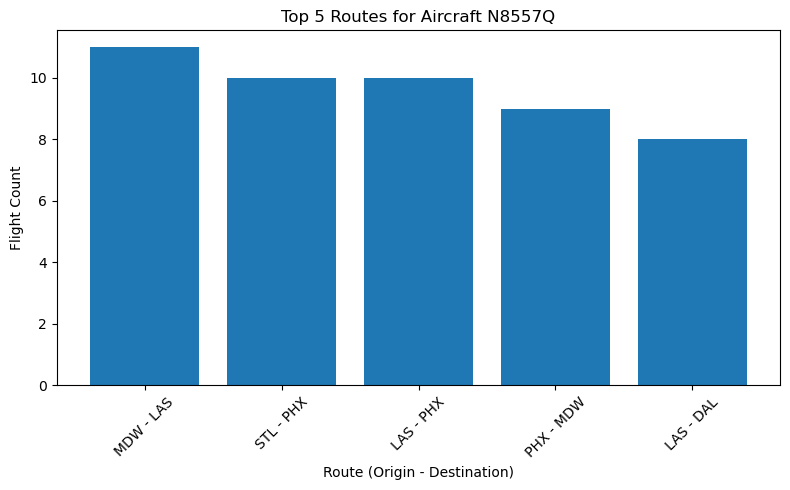


Analysis for Aircraft N420UA:

Airline: UA
Most Frequent Routes:
     ORIGIN DEST  flights
95     SFO  LAS       18
109    SFO  SEA       17
44     LAS  SFO       17
81     SEA  SFO       16
96     SFO  LAX       16


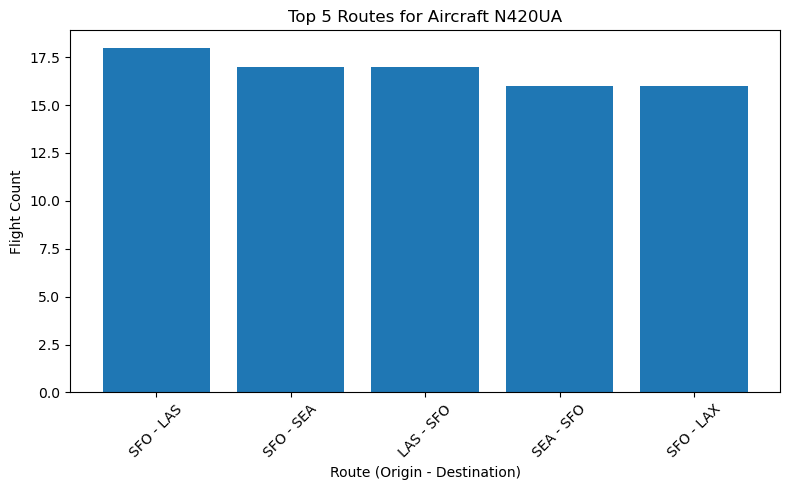


Analysis for Aircraft N111ZM:

Airline: AA
Most Frequent Routes:
   ORIGIN DEST  flights
6    LAX  JFK      246
2    JFK  LAX      206
9    SFO  JFK      110
3    JFK  SFO       64
1    BOS  LAX       13


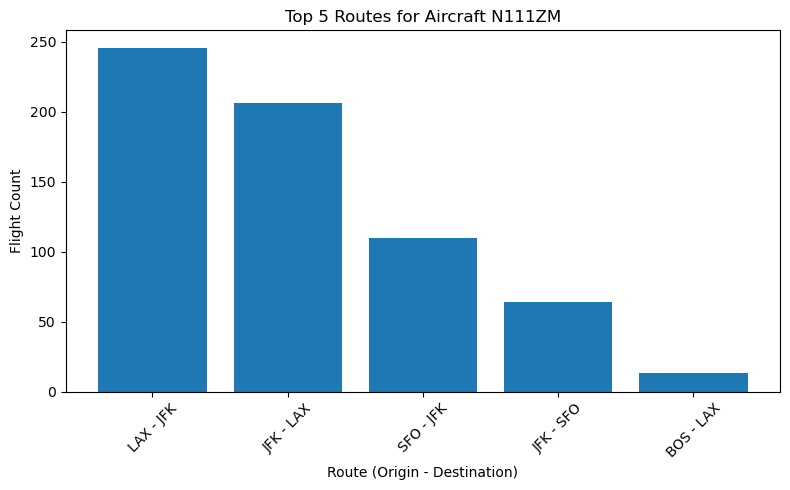

In [80]:
# Question 1: Indicate which airline operates the selected aircraft and where it often travels.
for tail_num in random_3_aircraft:
    print(f"\nAnalysis for Aircraft {tail_num}:\n")
    # Filter data for this specific aircraft
    aircraft_data = cleaned_df[cleaned_df['TAIL_NUM'] == tail_num]
    airlines = aircraft_data['CARRIER_CODE'].unique()
    print(f"Airline: {', '.join(airlines)}")
    # Get most frequent routes
    common_routes = (aircraft_data.groupby(['ORIGIN', 'DEST'])
                     .size()
                     .reset_index(name='flights')
                     .sort_values(by='flights', ascending=False)
                     .head(5))
    print("Most Frequent Routes:\n", common_routes)

    # Bar: Top 5 routes
    common_routes['route'] = common_routes['ORIGIN'] + ' - ' + common_routes['DEST']
    plt.figure(figsize=(8, 5))
    plt.bar(common_routes['route'], common_routes['flights'])
    plt.title(f"Top 5 Routes for Aircraft {tail_num}")
    plt.xlabel('Route (Origin - Destination)')
    plt.ylabel('Flight Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Aircraft N8557Q, operated by Southwest Airlines (WN), primarily travels between high-demand domestic routes. The most frequent route for this aircraft is between Chicago Midway (MDW) and Las Vegas (LAS), with 11 flights. Other common routes include St. Louis (STL) to Phoenix (PHX) and Las Vegas (LAS) to Phoenix (PHX), each with 10 flights. Additionally, the aircraft frequently travels between Phoenix (PHX) and Chicago Midway (MDW), with 9 flights, and from Las Vegas (LAS) to Dallas Love Field (DAL), with 8 flights. These results suggest that Aircraft N8557Q is often utilized for routes connecting major leisure and business destinations, particularly Las Vegas, Phoenix, and Chicago, indicating its role in supporting high-demand travel in the Southwest Airlines network.

Aircraft N420UA, operated by United Airlines (UA), primarily serves routes along the West Coast and to popular destinations such as Las Vegas and Seattle. The most frequent route for this aircraft is between San Francisco (SFO) and Las Vegas (LAS), with 18 flights, followed closely by the San Francisco (SFO) to Seattle (SEA) route, with 17 flights. Other common routes include Las Vegas (LAS) to San Francisco (SFO) and Seattle (SEA) to San Francisco (SFO), each with 16–17 flights. Additionally, the aircraft operates between San Francisco (SFO) and Los Angeles (LAX), with 16 flights. These results suggest that Aircraft N420UA plays a significant role in connecting key business and leisure destinations along the West Coast and to Las Vegas, a popular travel hub.

Aircraft N111ZM, operated by American Airlines (AA), is heavily utilized on high-traffic East Coast and transcontinental routes, with a focus on connecting New York and Los Angeles. The most frequent route for this aircraft is between Los Angeles (LAX) and New York (JFK), with 246 flights, followed by New York (JFK) to Los Angeles (LAX), with 206 flights. Other significant routes include San Francisco (SFO) to New York (JFK), with 110 flights, and New York (JFK) to San Francisco (SFO), with 64 flights. The aircraft also operates between Boston (BOS) and Los Angeles (LAX), with 13 flights. This suggests that Aircraft N111ZM is integral to American Airlines' transcontinental and major city route network, with a focus on connecting key metropolitan areas, especially on the popular Los Angeles-New York route.


Delay Analysis for Aircraft N8557Q:

        avg_dep_delay  avg_arr_delay
ORIGIN                              
ABQ         75.000000      67.333333
EWR         67.500000      56.500000
SNA         21.000000       4.000000
LAX         16.363636      10.787879
ATL         15.235294       8.529412
BUR         14.333333      14.666667
SJC         13.678571      11.892857
BWI         13.388889       9.944444
PHX         13.010870       8.782609
OAK         11.547619       9.761905


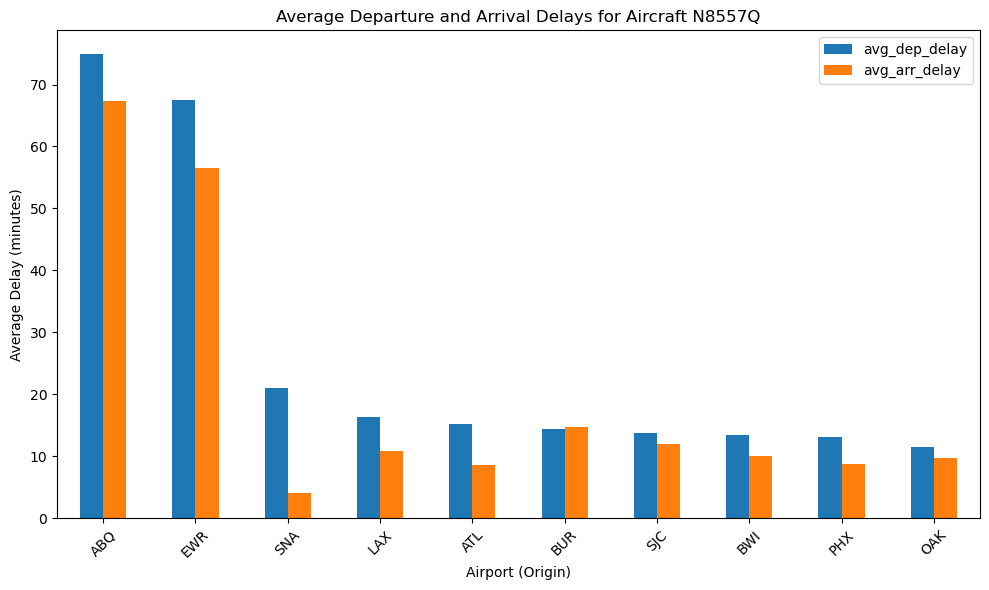


Delay Analysis for Aircraft N420UA:

        avg_dep_delay  avg_arr_delay
ORIGIN                              
MSY         66.750000      61.000000
SBA         38.000000      18.000000
RNO         29.000000      52.000000
PHL         26.000000      25.333333
MFR         22.333333      33.333333
IAH         19.787879      20.333333
PSP         17.250000       9.750000
SNA         17.105263      17.421053
IAD         13.333333      16.000000
SAN         11.458333      13.875000


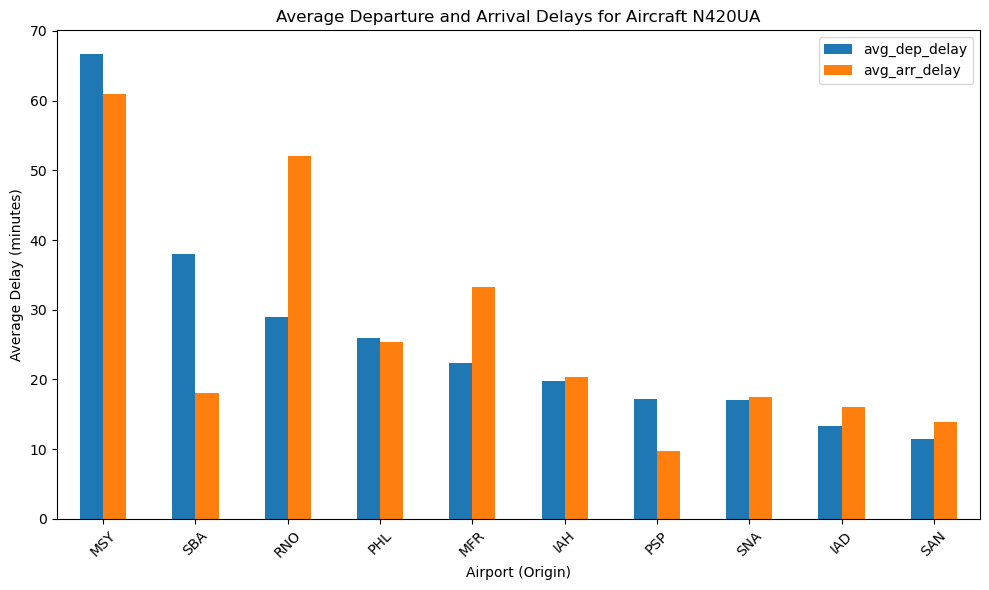


Delay Analysis for Aircraft N111ZM:

        avg_dep_delay  avg_arr_delay
ORIGIN                              
SFO         12.118182      11.318182
LAX          9.805344       8.843511
BOS          8.538462       5.846154
JFK          7.196296       5.348148
ATL          0.000000       0.000000
MIA          0.000000       0.500000


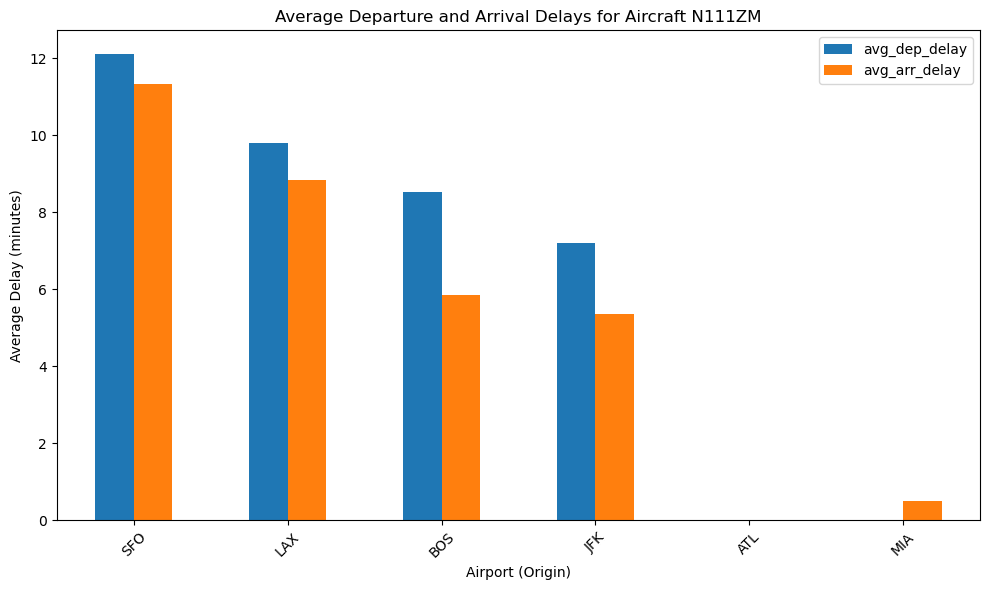

In [82]:
# Question 2: Arrival and departure delays at the airports where it traveled.
for tail_num in random_3_aircraft:
    print(f"\nDelay Analysis for Aircraft {tail_num}:\n")
    # Filter data for this specific aircraft
    aircraft_df = cleaned_df[cleaned_df['TAIL_NUM'] == tail_num]
    # Group airports by average delays
    delay_summary = aircraft_df.groupby('ORIGIN').agg(
        avg_dep_delay=('DEP_DELAY', 'mean'),
        avg_arr_delay=('ARR_DELAY', 'mean')
    ).sort_values(by='avg_dep_delay', ascending=False)
    print(delay_summary.head(10))
    # Bar: average departure and arrival delays for top 10 airports
    delay_summary.head(10).plot(kind='bar', figsize=(10, 6), stacked=False)
    plt.title(f"Average Departure and Arrival Delays for Aircraft {tail_num}")
    plt.xlabel('Airport (Origin)')
    plt.ylabel('Average Delay (minutes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For Aircraft N8557Q, the airport with the highest average departure delay is ABQ, with a significant delay of 75 minutes, followed by EWR at 67.5 minutes. These two airports exhibit notably longer delays compared to others. In terms of arrival delays, ABQ also leads with an average delay of 67.33 minutes. On the other hand, airports like SNA, LAX, and ATL have relatively lower delays, with SNA showing the lowest arrival delay at just 4 minutes. While several airports, including BUR, BWI, and PHX, report moderate delays for both departure and arrival, ABQ and EWR stand out for consistently high delays, suggesting that these airports may experience operational issues or congestion.

For Aircraft N420UA, the airport with the highest average departure delay is MSY (New Orleans) at 66.75 minutes, followed by SBA (Santa Barbara) with 38 minutes. MSY also leads in arrival delays with an average of 61 minutes, indicating possible operational challenges at this airport. Other airports with relatively high departure delays include RNO (Reno) at 29 minutes and PHL (Philadelphia) at 26 minutes. Meanwhile, airports like SAN (San Diego), PSP (Palm Springs), and IAD (Washington D.C.) show more moderate delays, with IAD having an average departure delay of 13.33 minutes and arrival delays of 16 minutes. Overall, MSY stands out as a consistently problematic airport for both departure and arrival delays, while other airports show less fluctuation.

Aircraft N111ZM operates with minimal delays across most of its routes. The airports with the highest delays are SFO (San Francisco) and LAX (Los Angeles), where departure delays average 12.12 and 9.81 minutes, respectively. However, even these delays are relatively low compared to the other aircraft analyzed. The arrival delays for these airports are also low, with SFO at 11.32 minutes and LAX at 8.84 minutes. Interestingly, airports like BOS (Boston), JFK (New York), MIA (Miami), and ATL (Atlanta) show almost negligible delays, with ATL even showing no delays for departures. These findings suggest that Aircraft N111ZM experiences good operational performance at most airports, with only minor delays observed at the major hubs like SFO and LAX.


Distance Analysis for Aircraft N8557Q:

count     679.000000
mean     1208.153166
std       604.531997
min       197.000000
25%       628.000000
50%      1243.000000
75%      1715.500000
max      2555.000000
Name: DISTANCE, dtype: float64


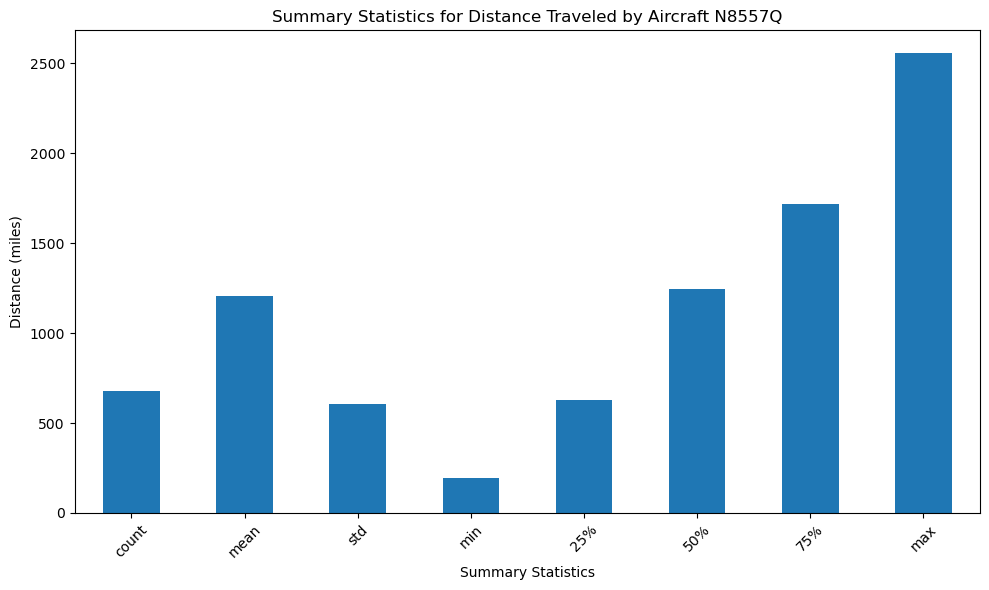


Distance Analysis for Aircraft N420UA:

count     443.000000
mean     1027.523702
std       664.850180
min        86.000000
25%       447.000000
50%       819.000000
75%      1504.000000
max      2521.000000
Name: DISTANCE, dtype: float64


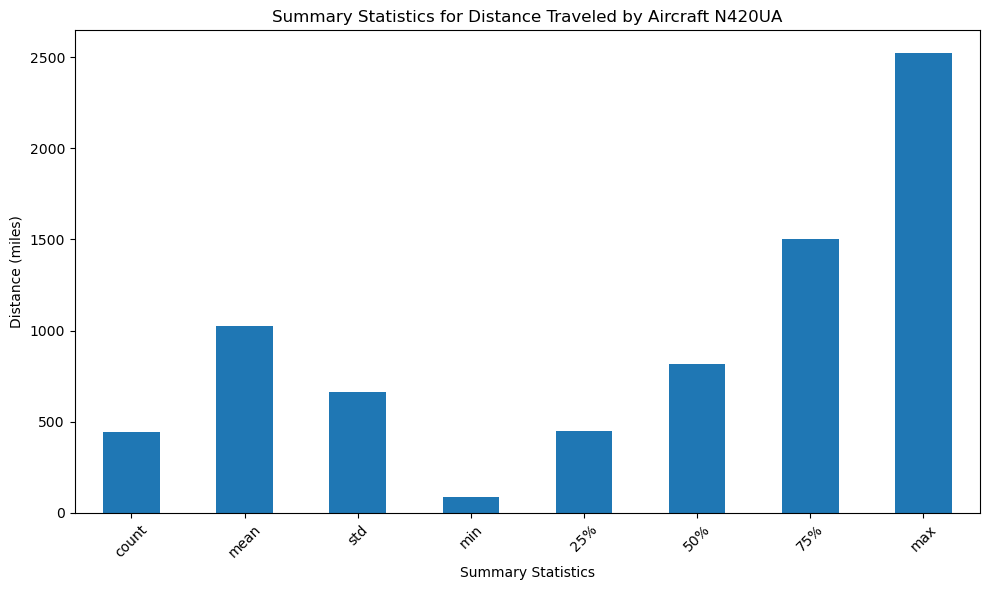


Distance Analysis for Aircraft N111ZM:

count     659.000000
mean     2506.462822
std        66.152488
min      1947.000000
25%      2475.000000
50%      2475.000000
75%      2586.000000
max      2611.000000
Name: DISTANCE, dtype: float64


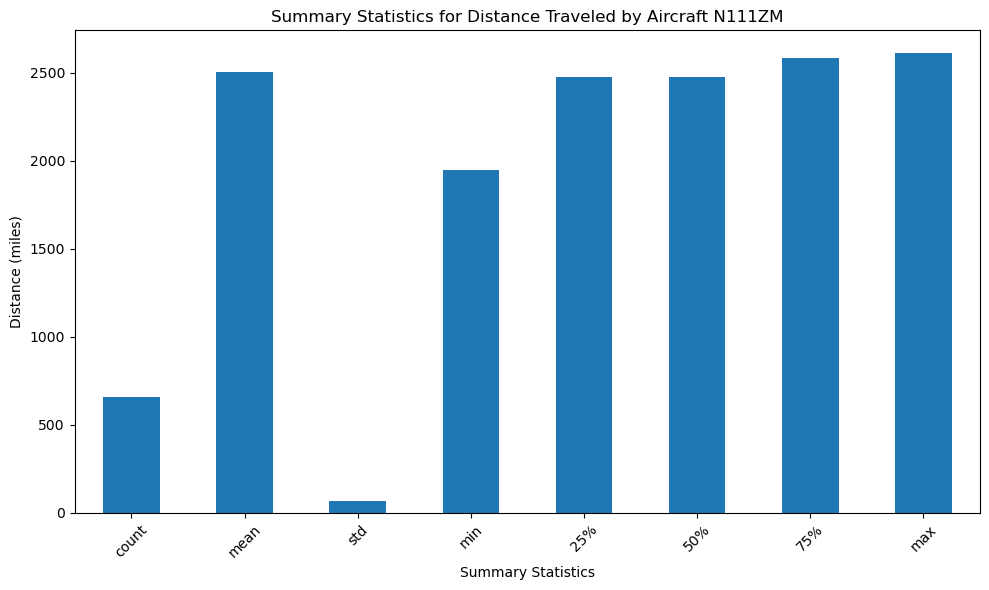

In [84]:
# Question 3: Create summary statistics on the distance traveled.
for tail_num in random_3_aircraft:
    print(f"\nDistance Analysis for Aircraft {tail_num}:\n")
    # Filter data for this specific aircraft
    aircraft_df = cleaned_df[cleaned_df['TAIL_NUM'] == tail_num]
    # Print summary statistics for flight distances
    distance_stats = aircraft_df['DISTANCE'].describe()
    print(distance_stats)
    # Summary stats & display
    distance_stats.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Summary Statistics for Distance Traveled by Aircraft {tail_num}")
    plt.ylabel('Distance (miles)')
    plt.xlabel('Summary Statistics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For Aircraft N8557Q, the distance traveled varies significantly. The average distance covered per flight is 1,208.15 miles, with a relatively high standard deviation of 604.53 miles, indicating that the aircraft travels both short and long distances. The minimum distance is 197 miles, suggesting occasional short-haul flights, while the maximum distance reached is 2,555 miles, representing longer flights. The 25th percentile (628 miles) and the 75th percentile (1,715.5 miles) show that a majority of the flights are of medium distance, likely in the range of 600 to 1,700 miles. Overall, this aircraft travels a broad spectrum of distances, with a slight bias toward medium to long-haul flights.

Aircraft N420UA travels a slightly shorter average distance compared to N8557Q, with a mean distance of 1,027.52 miles. The standard deviation of 664.85 miles is also relatively high, indicating a wide range of distances flown. The minimum distance is only 86 miles, likely reflecting some very short regional flights, while the maximum distance is 2,521 miles, suggesting the aircraft is also used for longer journeys. The interquartile range, with the 25th percentile at 447 miles and the 75th percentile at 1,504 miles, indicates that most of the flights are in the medium-distance range. Therefore, this aircraft likely operates on both regional and longer domestic routes.

Aircraft N111ZM shows a clear trend of long-distance flights, with an average distance of 2,506.46 miles. The standard deviation of 66.15 miles is quite low, implying that the distances flown are very consistent. The minimum distance traveled is 1,947 miles, which is still quite far for most commercial aircraft, and the maximum distance is 2,611 miles. The 25th and 75th percentiles (2,475 miles and 2,586 miles, respectively) suggest that nearly all flights are long-haul, with very little variation in the distances covered. This indicates that Aircraft N111ZM is likely used for longer, transcontinental or international routes, where the distances are much more consistent.

# Question 7 — Summary

Summarize the overall analysis and share THREE (3) key findings.

# **Summary of Overall Analysis:**

In 2019, flight delays were analyzed across airlines and airports to identify key patterns and areas for improvement. American Airlines (AA) had the highest overall departure delays, particularly in July, with long median delays and frequent severe outliers exceeding 24 hours. Southwest Airlines (WN) exhibited the lowest delays, though 29% of its flights were still delayed, but these delays were generally shorter and less severe. United Airlines (UA) consistently had lower delays compared to AA, with a median delay of 37.5 minutes, though it also faced occasional extreme disruptions. On the airport side, San Francisco International Airport (SFO) saw the highest departure delays, peaking in February, while Los Angeles International Airport (LAX) had the lowest delays. Phoenix Sky Harbor (PHX) and LAX displayed similar delay trends, while Las Vegas (LAS) showed fewer extreme delays but still faced significant congestion. The delay patterns followed a right-skewed distribution across both airlines and airports, indicating that while most delays were minor, occasional extreme disruptions occurred. Overall, the analysis highlighted operational inefficiencies at certain airlines and airports, with American Airlines and SFO facing more severe disruptions, and Southwest Airlines and LAX experiencing more frequent but less severe delays.

# **Key Findings:**

***Key Airlines Like American Airlines and Southwest Airlines Show Divergent Delay Patterns:***
- American Airlines faced the longest delays and more extreme outliers, indicating a need for improvement in operational efficiency to address these significant disruptions. In contrast, Southwest Airlines had a higher proportion of delayed flights but with shorter, less severe delays. This suggests that while operational disruptions exist across the industry, Southwest's delays are typically smaller in scale.
Key Airports Like SFO and LAX Experience Chronic Delays:

***Key Airports Like SFO and LAX Experience Chronic Delays:***
- San Francisco International Airport and Los Angeles International Airport consistently showed high delays, with SFO peaking at 13 minutes and LAX showing the lowest delays but still facing challenges. Both airports, along with Phoenix, continue to be major hubs for delays, which could be attributed to congestion and operational inefficiencies. These airports may need specific interventions to reduce delays.

**Patterns of Operational Disruption Across Airlines and Airports:** *italicized text*
- The normalization of delays across airlines and airports reveals that the frequency and severity of delays are not uniformly distributed. AA and UA experienced more extreme delays compared to Southwest, which faced more frequent but shorter delays. Similarly, certain airports like SFO and LAX experienced higher frequencies of delays, suggesting areas for targeted operational improvements.